# 1. Exploratory Data Analysis

In [351]:
import pandas as pd
import numpy as np
import io
import re

In [352]:
df = pd.read_csv('C:/GeekforGeeks/Data_Anaylsis/Python/Project/Airbnb_Project/data/airbnb.csv')

In [353]:
df

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price
0,49849504,Perla bungalov,4.71,64,Entire bungalow hosted by Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,"₹8,078 per night"
1,50891766,Authentic Beach Architect Sheltered Villa with...,New,NaN,Entire villa hosted by Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/61b70855-2...,"₹4,665 per night"
2,50699164,cottages sataplia,4.85,68,Entire cabin hosted by Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,"₹5,991 per night"
3,49871422,Sapanca Breathable Bungalow,5.0,13,Entire bungalow hosted by Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/72e6396e-e...,"₹11,339 per night"
4,51245886,Bungalov Ev 2,New,NaN,Entire bungalow hosted by Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/73973308-e...,"₹6,673 per night"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Dome hosted by Aidan,161552316.0,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠁,C...","Check-in: 3:00 pm - 11:00 pm,Check out: 11:00 ...",https://a0.muscache.com/im/pictures/miso/Hosti...,"₹4,288 per night"
14452,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Tent hosted by Martha,118954227.0,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 3:00 pm - 10:00 pm,Check out: 12:00 ...",https://a0.muscache.com/im/pictures/5ba944b2-b...,"₹15,200 per night"
14453,32977697,Paradise Eco Hub,4.67,3,Private room in dome hosted by Silas,175214568.0,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",Check-in: After 3:00 pm,https://a0.muscache.com/im/pictures/1f442c84-4...,"₹9,103 per night"
14454,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Dome hosted by Cempaka,718423.0,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: Flexible,Check out: 12:00 pm,No pets...",https://a0.muscache.com/im/pictures/105116799/...,"₹42,262 per night"


In [354]:
df.shape

(14456, 13)

In [355]:
len(df)

14456

In [356]:
df.columns.tolist()

['id',
 'name',
 'rating',
 'reviews',
 'host_name',
 'host_id',
 'address',
 'features',
 'amenities',
 'safety_rules',
 'hourse_rules',
 'img_links',
 'price']

In [357]:
df.isnull().sum()

id                 0
name               1
rating             0
reviews         2744
host_name          1
host_id          439
address           27
features          27
amenities        989
safety_rules     209
hourse_rules     209
img_links         27
price              0
dtype: int64

In [358]:
df['id'].duplicated().sum()

np.int64(732)

In [359]:
df['id'].drop_duplicates()

0        49849504
1        50891766
2        50699164
3        49871422
4        51245886
           ...   
14451    44697740
14452    29975283
14453    32977697
14454     8006146
14455    40547903
Name: id, Length: 13724, dtype: int64

In [360]:
df.nunique()

id              13724
name            13601
rating             77
reviews           423
host_name       11014
host_id         10791
address          6575
features         2694
amenities       11630
safety_rules      325
hourse_rules     6167
img_links       13598
price            8104
dtype: int64

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            14456 non-null  int64  
 1   name          14455 non-null  object 
 2   rating        14456 non-null  object 
 3   reviews       11712 non-null  object 
 4   host_name     14455 non-null  object 
 5   host_id       14017 non-null  float64
 6   address       14429 non-null  object 
 7   features      14429 non-null  object 
 8   amenities     13467 non-null  object 
 9   safety_rules  14247 non-null  object 
 10  hourse_rules  14247 non-null  object 
 11  img_links     14429 non-null  object 
 12  price         14456 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.4+ MB


In [362]:
df.head()

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price
0,49849504,Perla bungalov,4.71,64,Entire bungalow hosted by Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,"₹8,078 per night"
1,50891766,Authentic Beach Architect Sheltered Villa with...,New,NaN,Entire villa hosted by Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/61b70855-2...,"₹4,665 per night"
2,50699164,cottages sataplia,4.85,68,Entire cabin hosted by Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,"₹5,991 per night"
3,49871422,Sapanca Breathable Bungalow,5.0,13,Entire bungalow hosted by Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/72e6396e-e...,"₹11,339 per night"
4,51245886,Bungalov Ev 2,New,NaN,Entire bungalow hosted by Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/73973308-e...,"₹6,673 per night"


In [363]:
df.describe(include = 'all')

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price
count,1.445600e+04,14455,14456,11712,14455,1.401700e+04,14429,14429,13467,14247,14247,14429,14456
unique,NaN,13601,77,423,11014,NaN,6575,2694,11630,325,6167,13598,8104
top,NaN,Oops!,New,1,Pension hosted by Onda,NaN,"Manali, Himachal Pradesh, India","2 guests,1 bedroom,1 bed,1 bathroom","Long-term stays allowed,Unavailable: Carbon mo...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",Check-in: After 3:00 pm,https://a0.muscache.com/im/pictures/miso/Hosti...,"₹2,853 per night"
freq,NaN,26,4841,1318,43,NaN,220,1236,28,3908,217,5,78
mean,7.138227e+16,NaN,NaN,NaN,NaN,1.619384e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.962072e+17,NaN,NaN,NaN,NaN,1.403407e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.313100e+04,NaN,NaN,NaN,NaN,2.303900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.047078e+07,NaN,NaN,NaN,NaN,3.603925e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.524320e+07,NaN,NaN,NaN,NaN,1.243490e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.951689e+07,NaN,NaN,NaN,NaN,2.607109e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Cleaning

> ### 2.1) Price 

In [364]:
# Clean the 'price' column by removing '₹', ' per night', and commas
df['price'] = df['price'].astype(str).str.replace('₹', '', regex=False)
df['price'] = df['price'].str.replace(' per night', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False) # Remove commas

df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [365]:
df['price']

0         8078
1         4665
2         5991
3        11339
4         6673
         ...  
14451     4288
14452    15200
14453     9103
14454    42262
14455     9909
Name: price, Length: 14456, dtype: int64

In [366]:
df['price'].isna().sum()

np.int64(0)

> ### 2.2) Rating

In [367]:
df['rating'] = df['rating'].replace('New', float('nan')).astype(float)

In [368]:
df['rating']

0        4.71
1         NaN
2        4.85
3        5.00
4         NaN
         ... 
14451    4.94
14452    4.67
14453    4.67
14454    4.86
14455    4.85
Name: rating, Length: 14456, dtype: float64

> ### 2.3) Reviews

In [369]:
df['reviews'].isnull().sum()

np.int64(2744)

In [370]:
df['reviews']

0         64
1        NaN
2         68
3         13
4        NaN
        ... 
14451     16
14452      6
14453      3
14454      7
14455     13
Name: reviews, Length: 14456, dtype: object

In [371]:
df['reviews'] = df['reviews'].str.replace(',', '', regex=False)
# Convert to numeric, forcing non-numeric to NaN
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
# Replace NaNs with 0 and convert to integer
df['reviews'] = df['reviews'].fillna(0).astype(int)


In [372]:
df['reviews']

0        64
1         0
2        68
3        13
4         0
         ..
14451    16
14452     6
14453     3
14454     7
14455    13
Name: reviews, Length: 14456, dtype: int64

> ### 2.4) Host Id 

In [373]:
df['host_id'] = df['host_id'].convert_dtypes('int')


>> ### Information After the Type Converstion

In [374]:
print("Information about the dataset after type conversions:")
df.info()

Information about the dataset after type conversions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            14456 non-null  int64  
 1   name          14455 non-null  object 
 2   rating        9615 non-null   float64
 3   reviews       14456 non-null  int64  
 4   host_name     14455 non-null  object 
 5   host_id       14017 non-null  Int64  
 6   address       14429 non-null  object 
 7   features      14429 non-null  object 
 8   amenities     13467 non-null  object 
 9   safety_rules  14247 non-null  object 
 10  hourse_rules  14247 non-null  object 
 11  img_links     14429 non-null  object 
 12  price         14456 non-null  int64  
dtypes: Int64(1), float64(1), int64(3), object(8)
memory usage: 1.4+ MB


In [375]:
print("\nDescriptive statistics for numerical columns after conversion:")
df.describe()


Descriptive statistics for numerical columns after conversion:


,id,rating,reviews,host_id,price
count,1.445600e+04,9615.000000,14456.000000,14017.0,1.445600e+04
mean,7.138227e+16,4.857536,37.213060,161938427.567739,2.477365e+04
std,1.962072e+17,0.139234,68.006913,140340723.181196,8.861865e+04
min,1.313100e+04,3.000000,0.000000,23039.0,3.930000e+02
25%,2.047078e+07,4.770000,1.000000,36039247.0,3.994000e+03
50%,3.524320e+07,4.890000,10.000000,124348960.0,8.311500e+03
75%,4.951689e+07,4.980000,42.250000,260710915.0,1.722725e+04
max,7.017905e+17,5.000000,1003.000000,475897305.0,3.906351e+06


> ### 2.5) Removing the unnecessary columns

In [376]:
df = df.drop(['img_links'], axis = 1)

> ### 2.6) Handling Missing Values

In [377]:
original_rows = len(df)
df.dropna(subset = ['name', 'host_name', 'host_id', 'address', 'features', 'amenities', 'safety_rules', 'hourse_rules'], inplace=True)
rows_after_dropping = len(df)
print(f"\nRows dropped due to missing critical values: {original_rows - rows_after_dropping}")
print(f"Remaining rows: {rows_after_dropping}")


Rows dropped due to missing critical values: 1169
Remaining rows: 13287


In [378]:
print("\nMissing values after dropping rows with critical missing data:")
print(df.isnull().sum())


Missing values after dropping rows with critical missing data:
id                 0
name               0
rating          4269
reviews            0
host_name          0
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
price              0
dtype: int64


In [379]:
# Checking if rating is zero as well as review is a NaN. if yes then remove the entry 

df = df.drop(df[(df['rating'].isna()) & (df['reviews'] == 0)].index)
df = df.reset_index(drop=True)  


In [380]:
df.head()

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,price
0,49849504,Perla bungalov,4.71,64,Entire bungalow hosted by Mehmetcan,357334205,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",8078
1,50699164,cottages sataplia,4.85,68,Entire cabin hosted by Giorgi,409690853,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",5991
2,49871422,Sapanca Breathable Bungalow,5.00,13,Entire bungalow hosted by Melih,401873242,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",11339
3,42075682,"The Cottage, Private Pool Villa",4.67,3,Entire home hosted by Sukanya,173126583,"Tambon Bang Kachai, Chang Wat Chanthaburi, Tha...","10 guests,4 bedrooms,6 beds,3 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 3:00 pm,No smoking,No pets",30486
4,50425621,A private pension hut on the hillside of Sokli...,4.97,77,Farm stay hosted by 동현,81358542,"Sanoe-myeon, Boeun-gun, North Chungcheong Prov...","4 guests,1 bedroom,1 bed,1 bathroom","Mountain view,Kitchen,Free on-street parking,C...","󹀁,Airbnb's COVID-19 safety practices apply,Car...","Check-in: 3:00 pm - 9:00 pm,Check out: 11:00 a...",9052


# 3. Exploratory Data Analysis   

> ### 3.1) Analyze Price Distribution

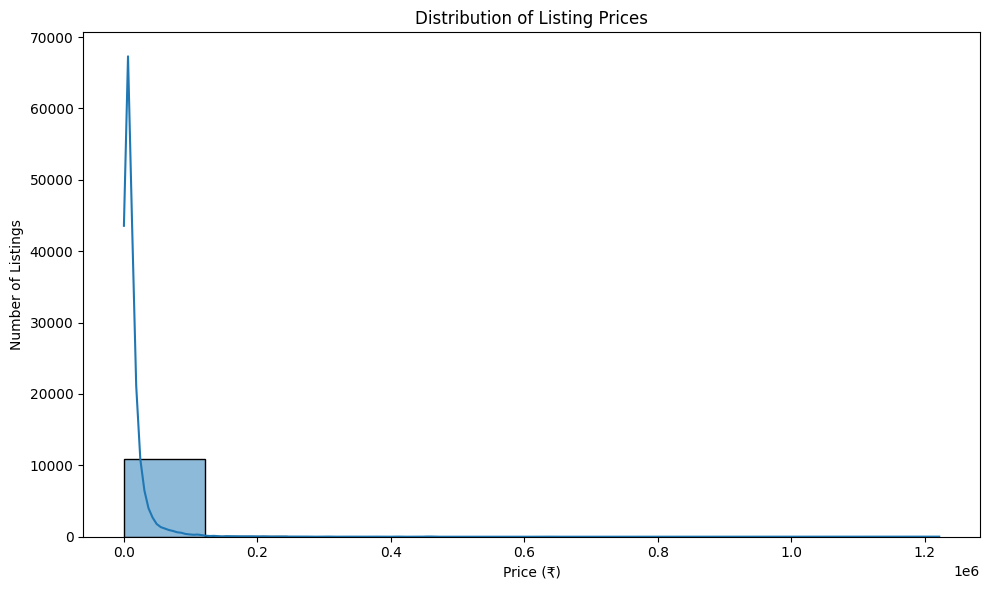

Descriptive statistics for 'price':
  count    1.090400e+04
mean     1.423597e+04
std      2.811540e+04
min      3.930000e+02
25%      3.994750e+03
50%      7.995000e+03
75%      1.499100e+04
max      1.221575e+06
Name: price, dtype: float64


In [381]:
import matplotlib.pyplot as plt
import seaborn as sns

# configure figure and set of subplots 
plt.figure(figsize=(10, 6))

# Price Distribution - Histogram
sns.histplot(df['price'], bins = 10, kde = True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Number of Listings')


plt.tight_layout()
plt.savefig('price_distribution.png')
plt.show()



# Display descriptive statistics for price
print("Descriptive statistics for 'price':\n ", df['price'].describe())



> ### 3.2) Data Cleaning and Extracting 

>> * ### Extract the host's name

In [382]:
def extract_host_name(text):
    if isinstance(text, str):
        match = re.search(r'hosted by\s*(.+)', text)
        if match:
            return match.group(1).strip()
    return np.nan
df['host_name'] = df['host_name'].apply(extract_host_name)


In [383]:
# Standardize capitalization (e.g., title case)
df['host_name'] = df['host_name'].astype(str).apply(lambda x: x.strip().title())


In [384]:
df['host_name'].isna().sum()

np.int64(0)

>>> * #### Temperary - extraction 

In [385]:
import re


def temp_extract_room_type(name_str):
    if pd.isna(name_str): return 'Unknown'
    name_str_lower = str(name_str).lower()
    if 'entire' in name_str_lower: return 'Entire home/apt'
    elif 'private room' in name_str_lower or 'room in ' in name_str_lower: return 'Private room'
    elif 'shared room' in name_str_lower: return 'Shared room'
    elif 'hotel' in name_str_lower: return 'Hotel room'
    return 'Other'

def temp_extract_property_type(name_str):
    if pd.isna(name_str): return 'Unknown'
    name_str_lower = str(name_str).lower()
    if 'villa' in name_str_lower: return 'Villa'
    if 'apartment' in name_str_lower or 'apt' in name_str_lower: return 'Apartment'
    if 'house' in name_str_lower: return 'House'
    if 'cabin' in name_str_lower: return 'Cabin'
    if 'bungalow' in name_str_lower: return 'Bungalow'
    if 'condo' in name_str_lower: return 'Condominium'
    if 'loft' in name_str_lower: return 'Loft'
    if 'guesthouse' in name_str_lower: return 'Guesthouse'
    if 'hotel' in name_str_lower: return 'Hotel'
    if 'chalet' in name_str_lower: return 'Chalet'
    if 'cottage' in name_str_lower: return 'Cottage'
    if 'tent' in name_str_lower: return 'Tent'
    if 'farm stay' in name_str_lower: return 'Farm Stay'
    if 'resort' in name_str_lower: return 'Resort'
    if 'hostel' in name_str_lower: return 'Hostel'
    if 'boat' in name_str_lower: return 'Boat'
    if 'rv' in name_str_lower or 'camper' in name_str_lower: return 'RV/Camper'
    if 'yurt' in name_str_lower: return 'Yurt'
    return 'Other'

# Apply temporary functions to inspect
df['_temp_room_type'] = df['name'].apply(temp_extract_room_type)
df['_temp_property_type'] = df['name'].apply(temp_extract_property_type)

print("Sample 'name' entries where _temp_room_type is 'Other':")
print(df[df['_temp_room_type'] == 'Other']['name'].sample(20, random_state=42).tolist()) # Use a fixed random_state for reproducibility

print("\nSample 'name' entries where _temp_property_type is 'Other':")
print(df[df['_temp_property_type'] == 'Other']['name'].sample(20, random_state=42).tolist())


Sample 'name' entries where _temp_room_type is 'Other':
['SCENIC', '【D室丨長期が超お得！】テレワーク・アパート代わりにも！北アルプスが見える広々洋風個室！BBQ可！', 'LAKERS BUNGALOV 3', 'Nile Sunrise Sailing from Esna to Aswan Full Board', 'Panoramic View in Tropical Paradise 热带风情海景小屋', 'Oư Villas No:10', 'A lemon Tree Hut  - Near Auroville', 'Amelia Windmill', 'Unforgettable holidays two steps from Acropolis 6', 'The Rustic Villa Stay with peace &modern amenities', "The trailer by the water's edge.", 'LAKE VIEW APPARTMENT', 'Luxurious Family 2BHK Pool Facing Wifi Near Baga', 'Cozy House near Patong Beach', 'spacious 2 bedroom apr.  near ski lift. Gudauri', 'Tzannis Cave House', 'Ranthambhore Aangan -Luxury Full Service Farm Stay', 'Villa Cevoli', 'Private  Room on ground floor RishikeshTapovan', 'Trullo Genesi, an Italian fairytail']

Sample 'name' entries where _temp_property_type is 'Other':
['Casa Terra - Trullo Ostuni', 'Car049 - Paradisiac island in Cartagena', 'Cabane jacuzzi "Plume", unusual night near Paris', 'Nature hol

In [386]:
# Drop temp columns
df.drop(columns=['_temp_room_type', '_temp_property_type'], inplace=True)


>> * ####  Extracting property_type

In [387]:
# Function to extract property_type from the 'name' column
def extract_property_type(name_str):
    if pd.isna(name_str):
        return 'Unknown'
    name_str_lower = str(name_str).lower()

    # Ordered by specificity
    if 'villa' in name_str_lower: 
        return 'Villa'
    if 'apartment' in name_str_lower or 'apt' in name_str_lower or 'flat' in name_str_lower: 
        return 'Apartment'
    if 'house' in name_str_lower: 
        return 'House'
    if 'cabin' in name_str_lower: 
        return 'Cabin'
    if 'bungalow' in name_str_lower: 
        return 'Bungalow'
    if 'condo' in name_str_lower or 'condominium' in name_str_lower: 
        return 'Condominium'
    if 'loft' in name_str_lower: 
        return 'Loft'
    if 'guesthouse' in name_str_lower: 
        return 'Guesthouse'
    if 'chalet' in name_str_lower: 
        return 'Chalet'
    if 'cottage' in name_str_lower: 
        return 'Cottage'
    if 'treehouse' in name_str_lower: 
        return 'Treehouse'
    if 'farm stay' in name_str_lower: 
        return 'Farm Stay'
    if 'resort' in name_str_lower: 
        return 'Resort'
    if 'hotel' in name_str_lower: 
        return 'Hotel'
    if 'hostel' in name_str_lower: 
        return 'Hostel'
    if 'boat' in name_str_lower: 
        return 'Boat'
    if 'rv' in name_str_lower or 'camper' in name_str_lower: 
        return 'RV/Camper'
    if 'yurt' in name_str_lower: 
        return 'Yurt'
    if 'tent' in name_str_lower: 
        return 'Tent'
    if 'mansion' in name_str_lower: 
        return 'Mansion'
    if 'capsule' in name_str_lower: 
        return 'Capsule Hotel'
    if 'ryokan' in name_str_lower: 
        return 'Ryokan' # Japanese inn
    if 'dorms' in name_str_lower: 
        return 'Dorm'
    if 'studio' in name_str_lower: 
        return 'Studio' # Can be a property type too
    if 'serviced apartment' in name_str_lower: 
        return 'Serviced Apartment'
    if 'townhouse' in name_str_lower: 
        return 'Townhouse'
    if 'tiny house' in name_str_lower: 
        return 'Tiny House'
    if 'igloo' in name_str_lower: 
        return 'Igloo'
    if 'dome' in name_str_lower: 
        return 'Dome'
    if 'castle' in name_str_lower: 
        return 'Castle'

    return 'Other'

# First, apply the further refined property_type extraction
df['property_type'] = df['name'].apply(extract_property_type)


In [388]:
print("\nValue counts for 'property_type' (Top 10):\n", df['property_type'].value_counts())



Value counts for 'property_type' (Top 10):
 property_type
Other          5264
House          1609
Villa          1334
Apartment       652
Cottage         371
Cabin           273
Yurt            173
Studio          158
Bungalow        130
Castle          127
Chalet          118
Tent            104
Loft             94
Hotel            87
Dome             85
RV/Camper        77
Resort           70
Farm Stay        38
Hostel           34
Mansion          33
Condominium      32
Boat             28
Igloo             7
Ryokan            6
Name: count, dtype: int64


In [389]:
df

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,price,property_type
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",8078,Other
1,50699164,cottages sataplia,4.85,68,Giorgi,409690853,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",5991,Cottage
2,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",11339,Bungalow
3,42075682,"The Cottage, Private Pool Villa",4.67,3,Sukanya,173126583,"Tambon Bang Kachai, Chang Wat Chanthaburi, Tha...","10 guests,4 bedrooms,6 beds,3 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 3:00 pm,No smoking,No pets",30486,Villa
4,50425621,A private pension hut on the hillside of Sokli...,4.97,77,동현,81358542,"Sanoe-myeon, Boeun-gun, North Chungcheong Prov...","4 guests,1 bedroom,1 bed,1 bathroom","Mountain view,Kitchen,Free on-street parking,C...","󹀁,Airbnb's COVID-19 safety practices apply,Car...","Check-in: 3:00 pm - 9:00 pm,Check out: 11:00 a...",9052,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Aidan,161552316,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠁,C...","Check-in: 3:00 pm - 11:00 pm,Check out: 11:00 ...",4288,House
10900,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Martha,118954227,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 3:00 pm - 10:00 pm,Check out: 12:00 ...",15200,Hotel
10901,32977697,Paradise Eco Hub,4.67,3,Silas,175214568,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",Check-in: After 3:00 pm,9103,Other
10902,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Cempaka,718423,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: Flexible,Check out: 12:00 pm,No pets...",42262,Villa


>> * ####  Extracting room_type

In [390]:
# Function to extract room_type from the 'name' column and infer from property_type
def extract_room_type(row):
    name_str_lower = str(row['name']).lower()
    property_type = row['property_type'] # Use the already extracted property_type

    # Explicit room type matches (priority 1)
    if 'private room' in name_str_lower or 'room in ' in name_str_lower:
        return 'Private room'
    elif 'shared room' in name_str_lower:
        return 'Shared room'
    elif 'hotel' in name_str_lower or 'resort' in name_str_lower or 'boutique stay' in name_str_lower:
        return 'Hotel room'

    # Infer room_type based on property_type if no explicit room type found (priority 2)
    # These property types generally imply an 'Entire home/apt'
    entire_home_property_types = ['Villa', 'Apartment', 'House', 'Cabin', 'Bungalow', 'Condominium', 'Loft','Guesthouse', 'Chalet', 'Cottage', 'Treehouse', 'Farm Stay', 'Mansion','Studio', 'Serviced Apartment', 'Townhouse', 'Tiny House', 'Igloo', 'Dome', 'Castle','Boat', 'RV/Camper', 'Yurt', 'Tent'] # Some unique stays are also entire

    if property_type in entire_home_property_types:
        return 'Entire home/apt'
    elif property_type in ['Hostel', 'Dorm', 'Capsule Hotel', 'Ryokan']: # These might be shared or private rooms within
        return 'Private room' # Assume private room within these if not explicitly shared

    # Catch-all for "entire" not caught by property type
    if 'entire' in name_str_lower:
        return 'Entire home/apt'

    return 'Other'

# Apply the further refined room_type extraction (requires property_type to be set)
df['room_type'] = df.apply(extract_room_type, axis=1)


In [391]:
print("\nValue counts for 'room_type' after further refinement:\n", df['room_type'].value_counts())
print("\nValue counts for 'property_type' after further refinement (Top 20):\n", df['property_type'].value_counts().head(20))



Value counts for 'room_type' after further refinement:
 room_type
Entire home/apt    5339
Other              5088
Private room        273
Hotel room          203
Shared room           1
Name: count, dtype: int64

Value counts for 'property_type' after further refinement (Top 20):
 property_type
Other        5264
House        1609
Villa        1334
Apartment     652
Cottage       371
Cabin         273
Yurt          173
Studio        158
Bungalow      130
Castle        127
Chalet        118
Tent          104
Loft           94
Hotel          87
Dome           85
RV/Camper      77
Resort         70
Farm Stay      38
Hostel         34
Mansion        33
Name: count, dtype: int64


In [392]:
df

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,price,property_type,room_type
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",8078,Other,Other
1,50699164,cottages sataplia,4.85,68,Giorgi,409690853,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",5991,Cottage,Entire home/apt
2,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",11339,Bungalow,Entire home/apt
3,42075682,"The Cottage, Private Pool Villa",4.67,3,Sukanya,173126583,"Tambon Bang Kachai, Chang Wat Chanthaburi, Tha...","10 guests,4 bedrooms,6 beds,3 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 3:00 pm,No smoking,No pets",30486,Villa,Entire home/apt
4,50425621,A private pension hut on the hillside of Sokli...,4.97,77,동현,81358542,"Sanoe-myeon, Boeun-gun, North Chungcheong Prov...","4 guests,1 bedroom,1 bed,1 bathroom","Mountain view,Kitchen,Free on-street parking,C...","󹀁,Airbnb's COVID-19 safety practices apply,Car...","Check-in: 3:00 pm - 9:00 pm,Check out: 11:00 a...",9052,House,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Aidan,161552316,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠁,C...","Check-in: 3:00 pm - 11:00 pm,Check out: 11:00 ...",4288,House,Entire home/apt
10900,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Martha,118954227,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 3:00 pm - 10:00 pm,Check out: 12:00 ...",15200,Hotel,Hotel room
10901,32977697,Paradise Eco Hub,4.67,3,Silas,175214568,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",Check-in: After 3:00 pm,9103,Other,Other
10902,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Cempaka,718423,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: Flexible,Check out: 12:00 pm,No pets...",42262,Villa,Entire home/apt


>>> * #### Checking for different spelling

In [393]:
print("\n--- Checking for 'bungalov' and 'bungalow' ---")
bungalov_count = df['name'].astype(str).str.contains('bungalov', case=False, na=False).sum()
bungalow_count = df['name'].astype(str).str.contains('bungalow', case=False, na=False).sum()

print(f"Number of 'bungalov' (case-insensitive) in 'name' column: {bungalov_count}")
print(f"Number of 'bungalow' (case-insensitive) in 'name' column: {bungalow_count}")

# Check how many of these are classified as 'Bungalow' in property_type
bungalov_prop_type_count = df[(df['name'].astype(str).str.contains('bungalov', case=False, na=False)) & (df['property_type'] == 'Bungalow')].shape[0]
bungalow_prop_type_count = df[(df['name'].astype(str).str.contains('bungalow', case=False, na=False)) & (df['property_type'] == 'Bungalow')].shape[0]

print(f"Number of 'bungalov' classified as 'Bungalow' property type: {bungalov_prop_type_count}")
print(f"Number of 'bungalow' classified as 'Bungalow' property type: {bungalow_prop_type_count}")



--- Checking for 'bungalov' and 'bungalow' ---
Number of 'bungalov' (case-insensitive) in 'name' column: 8
Number of 'bungalow' (case-insensitive) in 'name' column: 140
Number of 'bungalov' classified as 'Bungalow' property type: 0
Number of 'bungalow' classified as 'Bungalow' property type: 130


>>> * ##### Inspect 'Other' Category

In [394]:
print("\n--- Inspecting 'Other' categories after latest refinement ---")
print("Sample 'name' entries where room_type is 'Other':")
# Only sample if there are 'Other' entries to avoid error on empty slice
if not df[df['room_type'] == 'Other'].empty:
    print(df[df['room_type'] == 'Other']['name'].sample(20, random_state=42).tolist())
else:
    print("No 'Other' entries in room_type after refinement.")

print("\nSample 'name' entries where property_type is 'Other':")
if not df[df['property_type'] == 'Other'].empty:
    print(df[df['property_type'] == 'Other']['name'].sample(20, random_state=42).tolist())
else:
    print("No 'Other' entries in property_type after refinement.")



--- Inspecting 'Other' categories after latest refinement ---
Sample 'name' entries where room_type is 'Other':
['Forest Side Farm-Suite with Orchard-Mountain view', 'Pitch on family-run rural farm Vierseithof', 'Alhibé Farm Exclusive Homestay Accommodation', 'spacious 2 bedroom apr.  near ski lift. Gudauri', 'Triang Ecolodge Farm Retreat (Orchid)', 'Green Theme room with Terrace in 3bhk near Saket', "Limaye's paradise", 'Rooms at Künstlerhaus in Blaubeuren', 'La Casita', 'Classic Luxury in the Heart of Budapest', 'Beautiful & Spacious Rooms Gurgaon', "Spring Charming_Ancor's Home_Wilderness View 4 Person Room", 'Wonderful Kientaler Bijou - view of Blümlisalp', 'Leafy Greens Chiangmai : Mushroom M3', 'Private Island in the 1000 Islands', 'Waterfront Retreat on Dangar Island', 'GLAMPING Tipi on the farm NEXT to the swimmin pool', 'Bespoke Shepherd Hut on a Rural Essex Farm', '# Pienza No. 2 Pienza No. 2, a home where you can enjoy a wide range of nature and travel with your beloved dog

>>> * #### Refined - Function 

In [395]:
def extract_property_type_final(name_str):
    if pd.isna(name_str):
        return 'Unknown'
    name_str_lower = str(name_str).lower()

    # Prioritize specific and unique property types first
    if 'trullo' in name_str_lower or 'trulli' in name_str_lower: return 'Trullo'
    if 'dammuso' in name_str_lower or 'dammusi' in name_str_lower: return 'Dammuso'
    if 'haveli' in name_str_lower: return 'Haveli'
    if 'windmill' in name_str_lower or 'windmühle' in name_str_lower: return 'Windmill'
    if 'machiya' in name_str_lower: return 'Machiya (Townhouse)' # Specific Japanese townhouse
    if 'barn' in name_str_lower or 'cow shed' in name_str_lower or 'stable' in name_str_lower: return 'Barn/Stable' # Converted barns/stables
    if 'hut' in name_str_lower or 'hytte' in name_str_lower or 'cabana' in name_str_lower or 'bothy' in name_str_lower or 'mazot' in name_str_lower: return 'Hut/Cabana'
    if 'casa' in name_str_lower: return 'House' # 'Casa' means house
    if 'riad' in name_str_lower or 'dar ' in name_str_lower: return 'Riad/Dar' # Moroccan house/palace
    if 'gite' in name_str_lower: return 'Gite' # French holiday rental
    if 'cave' in name_str_lower or 'cueva' in name_str_lower or 'canava' in name_str_lower: return 'Cave'
    if 'container home' in name_str_lower or 'shipping container' in name_str_lower: return 'Container Home'
    if 'inn' in name_str_lower or 'auberge' in name_str_lower or 'oyado' in name_str_lower: return 'Inn'
    if 'lodge' in name_str_lower: return 'Lodge'
    if 'tower' in name_str_lower or 'torre' in name_str_lower: return 'Tower'
    if 'residence' in name_str_lower: return 'Residence'
    if 'palace' in name_str_lower or 'schloss' in name_str_lower: return 'Palace/Chateau'
    if 'estate' in name_str_lower or 'masseria' in name_str_lower or 'tenuta' in name_str_lower: return 'Estate'
    if 'wagon' in name_str_lower or 'trailer' in name_str_lower or 'roulotte' in name_str_lower or 'pipowagen' in name_str_lower or 'motorhome' in name_str_lower or 'caravan' in name_str_lower or 'airstream' in name_str_lower or 'circus car' in name_str_lower or 'unimog' in name_str_lower: return 'RV/Caravan/Wagon'
    if 'pod' in name_str_lower or 'glamping pod' in name_str_lower: return 'Glamping Pod'
    if 'pyramid' in name_str_lower: return 'Pyramid'
    if 'koteji' in name_str_lower: return 'Cottage' # Japanese for cottage
    if 'boathouse' in name_str_lower: return 'Boathouse'
    if 'aquarium' in name_str_lower: return 'Aquarium' # Likely a unique converted space
    if 'temple' in name_str_lower: return 'Converted Temple' # Converted space
    if 'church' in name_str_lower: return 'Converted Church' # Converted space
    if 'kiosk' in name_str_lower: return 'Kiosk (Unique Stay)'
    if 'retreat' in name_str_lower: return 'Retreat' # Generic, can be various types
    if 'oasis' in name_str_lower: return 'Oasis (Unique Stay)'

    # Common property types
    if 'villa' in name_str_lower or 'vilasita' in name_str_lower: return 'Villa'
    if 'apartment' in name_str_lower or 'apt' in name_str_lower or 'flat' in name_str_lower or 'bhk' in name_str_lower or 'br' in name_str_lower or 'duplex' in name_str_lower: return 'Apartment'
    if 'house' in name_str_lower or 'home' in name_str_lower or 'maison' in name_str_lower or 'holidayhome' in name_str_lower or 'hacienda' in name_str_lower: return 'House'
    if 'cabin' in name_str_lower or 'cabañas' in name_str_lower: return 'Cabin'
    if 'bungalow' in name_str_lower or 'bungalov' in name_str_lower: return 'Bungalow'
    if 'cottage' in name_str_lower: return 'Cottage'
    if 'chalet' in name_str_lower or 'maiensäss' in name_str_lower: return 'Chalet'
    if 'guesthouse' in name_str_lower or 'pension' in name_str_lower or 'minshuku' in name_str_lower: return 'Guesthouse'
    if 'loft' in name_str_lower or 'attic' in name_str_lower: return 'Loft'
    if 'studio' in name_str_lower: return 'Studio'
    if 'townhouse' in name_str_lower: return 'Townhouse'
    if 'tiny home' in name_str_lower: return 'Tiny House'
    if 'mansion' in name_str_lower: return 'Mansion'

    # Glamping / Camping / Tents
    if 'glamping' in name_str_lower or 'glamp' in name_str_lower: return 'Glamping (Tent/Dome)'
    if 'camp' in name_str_lower or 'campsite' in name_str_lower or 'bivouac' in name_str_lower: return 'Camp/Campsite'
    if 'yurt' in name_str_lower or 'ger' in name_str_lower or 'yourte' in name_str_lower: return 'Yurt'
    if 'tent' in name_str_lower or 'tenda' in name_str_lower: return 'Tent'
    if 'dome' in name_str_lower or 'zome' in name_str_lower or 'bubble' in name_str_lower: return 'Dome'
    if 'igloo' in name_str_lower: return 'Igloo'

    # Water-based properties
    if 'boat' in name_str_lower or 'yacht' in name_str_lower or 'catamaran' in name_str_lower or 'cruise' in name_str_lower or 'ship' in name_str_lower: return 'Boat/Yacht'

    # Hotel/Resort categories
    if 'hotel' in name_str_lower or 'resort' in name_str_lower or 'hostel' in name_str_lower or 'capsule' in name_str_lower or 'poshtel' in name_str_lower or 'motel' in name_str_lower or 'hostal' in name_str_lower: return 'Hotel/Hostel'
    if 'ryokan' in name_str_lower: return 'Ryokan' # Japanese inn

    # Farm related
    if 'farm stay' in name_str_lower or 'farmhouse' in name_str_lower or 'farm' in name_str_lower or 'agriturismo' in name_str_lower: return 'Farm Stay'
    if 'ranch' in name_str_lower: return 'Ranch'

    # Room/Shared accommodation implies property (less specific)
    if 'homestay' in name_str_lower or 'b&b' in name_str_lower: return 'Homestay/B&B'
    if 'residency' in name_str_lower: return 'Guesthouse/Residency'

    # Islands (can be a property type in itself if private)
    if 'island' in name_str_lower: return 'Private Island'

    return 'Other'

# Apply the greatly refined property_type extraction
df['property_type'] = df['name'].apply(extract_property_type_final)

# Updated and more comprehensive function to extract room_type
def extract_room_type_final(row):
    name_str_lower = str(row['name']).lower()
    property_type = row['property_type'] # Use the already extracted property_type

    # Priority 1: Explicit room type keywords
    if 'entire home/apt' in name_str_lower or 'entire place' in name_str_lower or 'exclusive use' in name_str_lower or '貸切' in name_str_lower: # 貸切 means private rental/entire house in Japanese
        return 'Entire home/apt'
    elif 'private room' in name_str_lower or 'room in ' in name_str_lower or 'bedroom' in name_str_lower or 'double room' in name_str_lower or 'single room' in name_str_lower or 'quadruple room' in name_str_lower or 'family room' in name_str_lower or 'chambre' in name_str_lower or 'habitación' in name_str_lower or '客室' in name_str_lower or '房' in name_str_lower or 'suite' in name_str_lower:
        # If 'suite' and it's a hotel/hostel property, then 'Hotel room', else 'Entire home/apt' (for apartment-like suites)
        if property_type in ['Hotel/Hostel', 'Ryokan', 'Inn', 'Guesthouse/Residency']:
            return 'Hotel room' # Suites within hotels are Hotel rooms
        else:
            return 'Private room' # Assume it's a private room (like a bedroom) unless it's a dedicated 'entire' suite.
    elif 'shared room' in name_str_lower or 'dorms' in name_str_lower or 'coliving' in name_str_lower or 'barracks' in name_str_lower or 'internat' in name_str_lower:
        return 'Shared room'
    elif 'hotel room' in name_str_lower or 'hotel' in name_str_lower or 'resort' in name_str_lower or 'boutique stay' in name_str_lower or property_type in ['Hotel/Hostel', 'Ryokan']:
        return 'Hotel room'
    elif 'studio' in name_str_lower: # Studios are typically entire spaces
        return 'Entire home/apt'
    elif 'bhk' in name_str_lower or 'br' in name_str_lower: # 1BHK, 2BHK, 1BR, 2BR generally imply entire apartment/house
        return 'Entire home/apt'


    # Priority 2: Infer room_type based on the refined property_type
    # Most standalone property types generally imply an 'Entire home/apt'
    entire_home_property_types = ['Trullo', 'Dammuso', 'Haveli', 'Windmill', 'Machiya (Townhouse)', 'Barn/Stable','Hut/Cabana', 'House', 'Riad/Dar', 'Gite', 'Cave', 'Container Home', 'Inn', 'Lodge','Tower', 'Residence', 'Palace/Chateau', 'Estate', 'RV/Caravan/Wagon', 'Glamping Pod','Pyramid', 'Boathouse', 'Aquarium', 'Converted Temple', 'Converted Church','Kiosk (Unique Stay)', 'Oasis (Unique Stay)', 'Villa', 'Apartment', 'Cabin','Bungalow', 'Cottage', 'Chalet', 'Loft', 'Studio', 'Townhouse', 'Tiny House','Mansion', 'Treehouse', 'Castle', 'Glamping (Tent/Dome)', 'Camp/Campsite', 'Yurt', 'Tent','Dome', 'Igloo', 'Boat/Yacht', 'Farm Stay', 'Ranch', 'Private Island', 'Retreat']

    if property_type in entire_home_property_types:
        return 'Entire home/apt'

    # Specific cases for 'Private room' from property_type or general 'room' keyword
    if property_type in ['Homestay/B&B', 'Guesthouse/Residency'] or 'homestay' in name_str_lower or 'bnb' in name_str_lower:
        return 'Private room' # These typically offer private rooms
    if 'room' in name_str_lower: # Catch-all for generic 'room' if not caught by specific types
        return 'Private room'

    return 'Other'

# Apply the greatly refined room_type extraction (requires property_type to be set)
df['room_type'] = df.apply(extract_room_type_final, axis=1)

# --- Re-display Value Counts ---
print("\nValue counts for 'room_type' after FINAL (v2) refinement:\n", df['room_type'].value_counts())
print("\nValue counts for 'property_type' after FINAL (v2) refinement (Top 25):\n", df['property_type'].value_counts().head(25))



Value counts for 'room_type' after FINAL (v2) refinement:
 room_type
Entire home/apt    7523
Other              1660
Private room       1395
Hotel room          320
Shared room           6
Name: count, dtype: int64

Value counts for 'property_type' after FINAL (v2) refinement (Top 25):
 property_type
Other                   2379
House                   1991
Villa                   1253
Apartment               1045
Hut/Cabana               313
Cottage                  312
Cabin                    244
Trullo                   233
Hotel/Hostel             204
Riad/Dar                 181
Yurt                     174
Cave                     172
Dammuso                  168
Camp/Campsite            166
Glamping (Tent/Dome)     150
RV/Caravan/Wagon         143
Studio                   139
Bungalow                 129
Tower                    125
Farm Stay                118
Retreat                  112
Chalet                   111
Inn                      101
Loft                      84
L

In [396]:
print("\n--- Inspecting 'Other' categories after latest refinement ---")
print("Sample 'name' entries where room_type is 'Other':")
# Only sample if there are 'Other' entries to avoid error on empty slice
if not df[df['room_type'] == 'Other'].empty:
    print(df[df['room_type'] == 'Other']['name'].tolist())
else:
    print("No 'Other' entries in room_type after refinement.")

print("\nSample 'name' entries where property_type is 'Other':")
if not df[df['property_type'] == 'Other'].empty:
    print(df[df['property_type'] == 'Other']['name'].tolist())
else:
    print("No 'Other' entries in property_type after refinement.")


--- Inspecting 'Other' categories after latest refinement ---
Sample 'name' entries where room_type is 'Other':
['Enthralling Escapes with snow view mountains #', 'Sapancaguldibibugalov', 'A-Frame of Mind', 'LOGIN OKINAWA -wood-', 'Welcome from Borjomi', 'Unique views of Rize badara plateau', 'Balai Maniago', 'Sleeps 2 with a private pool and a jacuzzi in nature', 'Triangle on the rocks!', '3 minute walk from the beach', '(,)', '으지네민박', '(,)', 'AFTERNOON CLOUD, Ubud', 'galle, quiet and peaceful on the edge of the city', 'The Blue Moon In Orange Garden', 'haaziko, az erdőszéli kabin a Dunakanyarban', 'Zen Garden', 'Cays is quiet and peaceful on the edge of the city', 'Forest (FoRest. Forest & Relax) -Activities', 'Lika Sunset Bojana', 'Circle, quiet and peaceful on the edge of the city', 'pool \r\n🏊jacuzzi\r\n⛲large garden\r\n🌴barbecue\r\n🍖isolated holiday 👏👏👏', 'Pyeongchang Daegwanryeong Pension # Pretty Pension # Gangneung Pension # Couple Accommodation # Private Pension # On the way

>>> * ##### Plot Price Distribution by Room Type

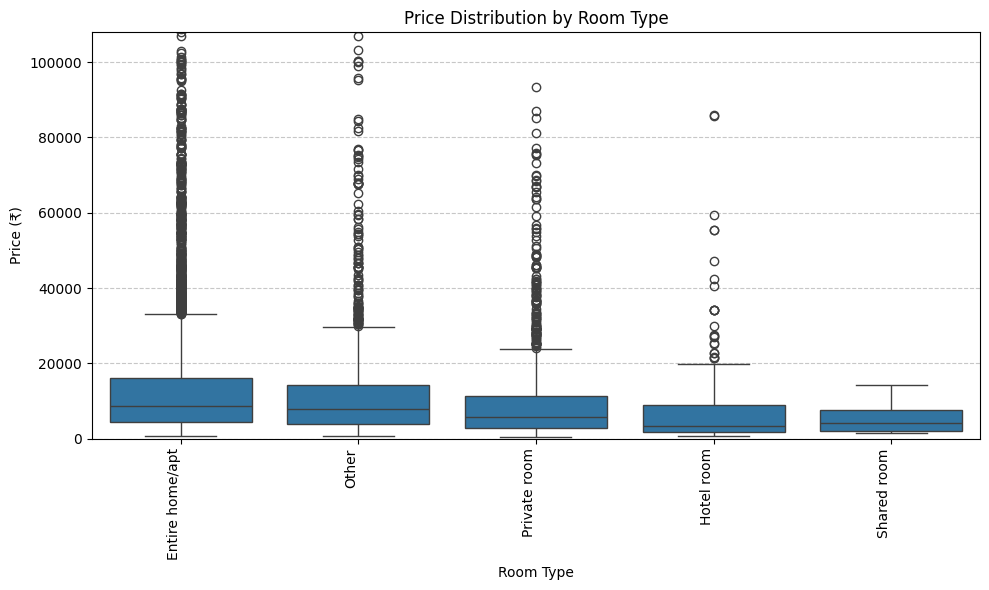

In [397]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'room_type', y = 'price', data = df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Price (₹)')
plt.ylim(0, df['price'].quantile(0.99))
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.savefig('price_by_room_type_final.png')
plt.show()


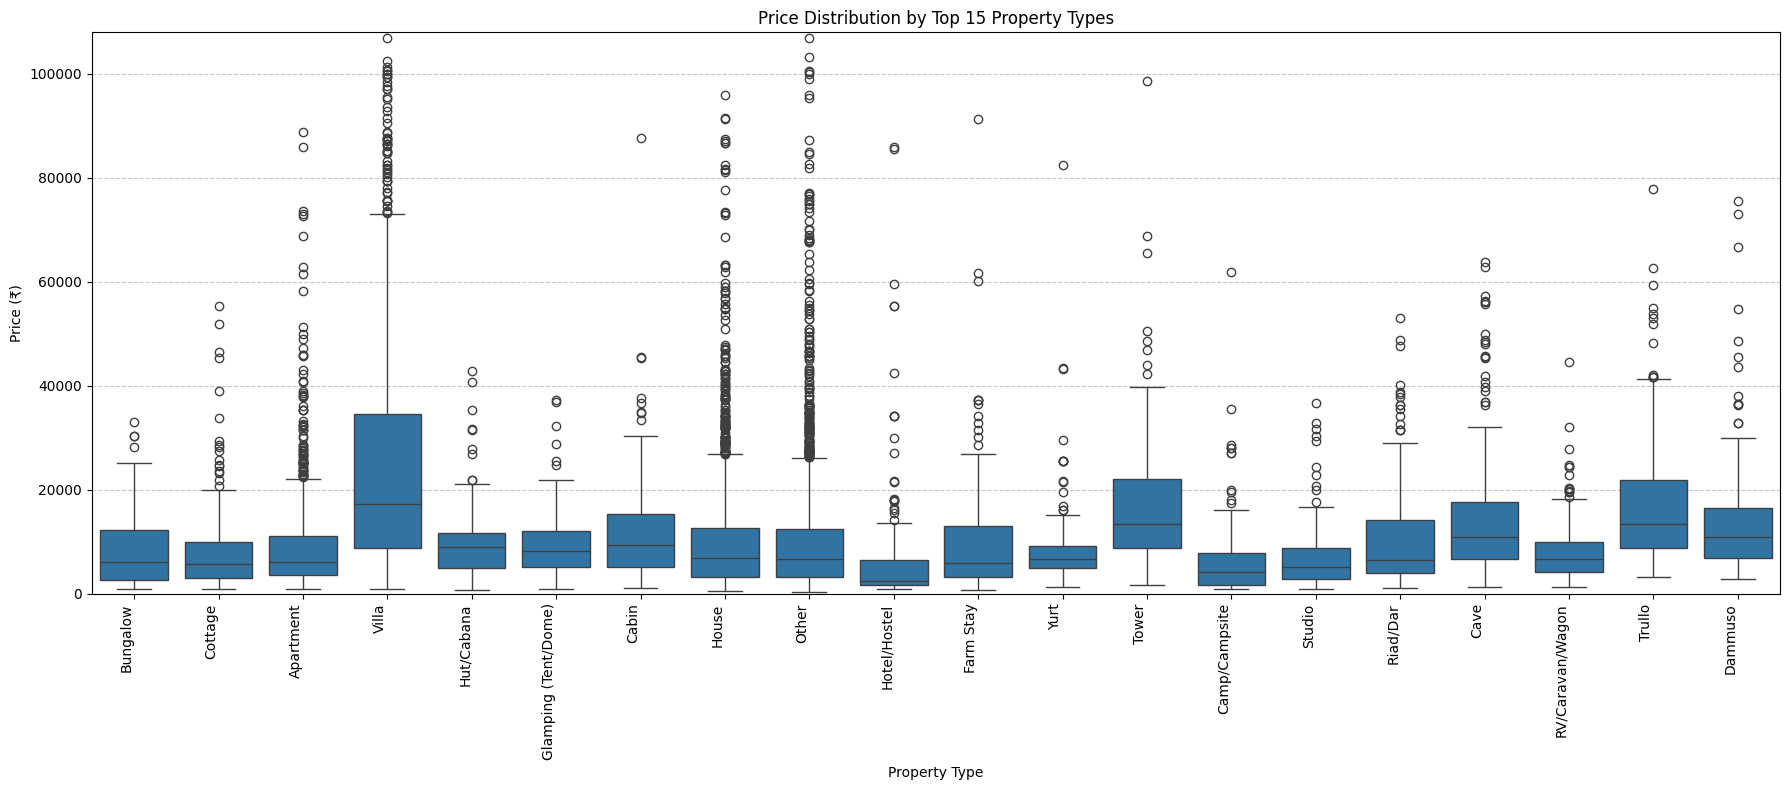

In [398]:
top_property_types_to_plot_final = df['property_type'].value_counts().head(20).index.tolist()
df_top_property_types_plot_final = df[df['property_type'].isin(top_property_types_to_plot_final)]

plt.figure(figsize=(18, 8))
sns.boxplot(x='property_type', y='price', data = df_top_property_types_plot_final)
plt.title('Price Distribution by Top 15 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Price (₹)')
plt.xticks(rotation=90, ha='right')
plt.ylim(0, df['price'].quantile(0.99))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_by_property_type_final.png')
plt.show()

>>> * #### Listing per host extract

In [399]:
# We group by 'host_name' and count the number of listings ('id')
listings_count_cleaned = df.groupby('host_name')['host_id'].transform('count').convert_dtypes(int)
df['listings_per_host'] = listings_count_cleaned
df['listings_per_host'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10904 entries, 0 to 10903
Series name: listings_per_host
Non-Null Count  Dtype
--------------  -----
10904 non-null  Int64
dtypes: Int64(1)
memory usage: 96.0 KB


In [400]:
# Display the first few rows with the new cleaned host name and updated listings_per_host
print("DataFrame head with 'host_name' and updated 'listings_per_host':")
print(df[['host_name','host_id', 'listings_per_host']].head())


DataFrame head with 'host_name' and updated 'listings_per_host':
   host_name    host_id  listings_per_host
0  Mehmetcan  357334205                  2
1     Giorgi  409690853                 19
2      Melih  401873242                  1
3    Sukanya  173126583                  1
4         동현   81358542                  1


In [401]:
# Check for any new NaNs in the new column (should be none after fillna)
print("\nMissing values in 'host_name':")
print(df['host_name'].isnull().sum())



Missing values in 'host_name':
0


In [402]:
# Display the distribution of 'listings_per_host' again with the more accurate calculation
print("\nUpdated Distribution of 'listings_per_host':")
print(df['listings_per_host'].describe())
print("\nTop 10 'host_name' by listings_per_host (after cleaning):")
print(df.groupby('host_name')['listings_per_host'].mean().sort_values(ascending=False).head(10))



Updated Distribution of 'listings_per_host':
count     10904.0
mean     4.666178
std      6.370309
min           1.0
25%           1.0
50%           2.0
75%           5.0
max          47.0
Name: listings_per_host, dtype: Float64

Top 10 'host_name' by listings_per_host (after cleaning):
host_name
Maria       47.0
Shanu       38.0
George      36.0
David       36.0
Anna        32.0
Onda        29.0
Vishal      22.0
Patrick     22.0
Andrea      22.0
Giuseppe    22.0
Name: listings_per_host, dtype: Float64


>>> * ### Extracting Amemidies

In [403]:
amenities_list = [
    'Wifi',
    'Kitchen',
    'Free parking on premises',
    'Private pool',
    'TV',
    'Air conditioning',
    'Pets allowed',
    'Washer',
    'Dryer',
    'Hot tub',
    'Indoor fireplace',
    'Smoking allowed' 
]

In [404]:
# Create new binary columns for each amenity
for amenity in amenities_list:
    # Use re.escape for amenities with special characters like 'BBQ grill'
    # Use re.IGNORECASE for case-insensitive matching
    df[f'has_{amenity.lower().replace(" ", "_")}'] = df['amenities'].astype(str).apply(
        lambda x: bool(re.search(r'\b' + re.escape(amenity) + r'\b', x, re.IGNORECASE))
    )

# For 'Smoking allowed', also check 'hourse_rules'
df['has_smoking_allowed'] = df.apply(
    lambda row: row['has_smoking_allowed'] or bool(re.search(r'\bSmoking is allowed\b', str(row['hourse_rules']), re.IGNORECASE)),
    axis=1
)

In [405]:
# Display the first few rows with new amenity columns
print("DataFrame with new amenity features (first 5 rows):")
print(df[[col for col in df.columns if 'has_' in col]].head())

# Display the count of listings for each amenity
print("\nNumber of listings for each extracted amenity:")
for amenity_col in [col for col in df.columns if 'has_' in col]:
    print(f"{amenity_col}: {df[amenity_col].sum()}")


DataFrame with new amenity features (first 5 rows):
   has_wifi  has_kitchen  has_free_parking_on_premises  has_private_pool  \
0      True         True                          True             False   
1      True         True                         False             False   
2      True         True                          True              True   
3      True         True                          True              True   
4     False         True                         False             False   

   has_tv  has_air_conditioning  has_pets_allowed  has_washer  has_dryer  \
0    True                 False              True       False      False   
1    True                 False              True       False      False   
2   False                 False             False       False      False   
3    True                  True             False       False      False   
4   False                  True             False       False       True   

   has_hot_tub  has_indoor_firepla

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10904 entries, 0 to 10903
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10904 non-null  int64  
 1   name                          10904 non-null  object 
 2   rating                        9018 non-null   float64
 3   reviews                       10904 non-null  int64  
 4   host_name                     10904 non-null  object 
 5   host_id                       10904 non-null  Int64  
 6   address                       10904 non-null  object 
 7   features                      10904 non-null  object 
 8   amenities                     10904 non-null  object 
 9   safety_rules                  10904 non-null  object 
 10  hourse_rules                  10904 non-null  object 
 11  price                         10904 non-null  int64  
 12  property_type                 10904 non-null  object 
 13  r

>>> * #### Extracting Feature

In [407]:
def extract_feature_count(text, keywords):
    if isinstance(keywords, str):
        keywords = [keywords]
    
    text = str(text).lower()
    
    for keyword in keywords:
        pattern = rf'(\d+)\s*\b{keyword}\b'
        match = re.search(pattern, text)
        if match:
            return int(match.group(1))
    
    return None


df['guests'] = df['features'].apply(lambda x: extract_feature_count(x, ['guests', 'guest']))

df['bedrooms'] = df['features'].apply(lambda x: extract_feature_count(x, ['bedroom', 'bedrooms']))

df['beds'] = df['features'].apply(lambda x: extract_feature_count(x, ['bed', 'beds']))

df['bathrooms'] = df['features'].apply(lambda x: extract_feature_count(x, ['bathroom', 'bathrooms']))

df['bedrooms'] = df['bedrooms'].convert_dtypes(int)
df['beds'] = df['beds'].convert_dtypes(int)
df['bathrooms'] = df['bathrooms'].convert_dtypes(int)

print("\nInfo for numerical feature columns :")
print(df[['guests', 'bedrooms', 'beds', 'bathrooms']].info())
print("\nHead of numerical feature columns :")
print(df[['guests', 'bedrooms', 'beds', 'bathrooms']].head())



Info for numerical feature columns :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10904 entries, 0 to 10903
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   guests     10904 non-null  int64
 1   bedrooms   10296 non-null  Int64
 2   beds       10694 non-null  Int64
 3   bathrooms  8404 non-null   Int64
dtypes: Int64(3), int64(1)
memory usage: 372.8 KB
None

Head of numerical feature columns :
   guests  bedrooms  beds  bathrooms
0       2         2     1          1
1       4         1     3          1
2       4         1     2          1
3      10         4     6          3
4       4         1     1          1


In [408]:
df.head()

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,...,has_pets_allowed,has_washer,has_dryer,has_hot_tub,has_indoor_fireplace,has_smoking_allowed,guests,bedrooms,beds,bathrooms
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,True,False,False,False,False,True,2,2,1,1
1,50699164,cottages sataplia,4.85,68,Giorgi,409690853,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,True,False,False,False,False,False,4,1,3,1
2,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,False,False,False,False,False,False,4,1,2,1
3,42075682,"The Cottage, Private Pool Villa",4.67,3,Sukanya,173126583,"Tambon Bang Kachai, Chang Wat Chanthaburi, Tha...","10 guests,4 bedrooms,6 beds,3 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,False,False,False,False,False,False,10,4,6,3
4,50425621,A private pension hut on the hillside of Sokli...,4.97,77,동현,81358542,"Sanoe-myeon, Boeun-gun, North Chungcheong Prov...","4 guests,1 bedroom,1 bed,1 bathroom","Mountain view,Kitchen,Free on-street parking,C...","󹀁,Airbnb's COVID-19 safety practices apply,Car...",...,False,False,True,False,False,False,4,1,1,1


>>> * #### Cleaning Safety Rules

In [409]:
# Clean the 'safety_rules' column
# Remove known prefixes and "Show more"
def clean_safety_rules(text):
    if pd.isna(text):
        return ""
    # Remove unicode characters (like 󹀁, 󱠃), "Show more", and leading/trailing commas
    text = re.sub(r'[^\x00-\x7F]+', '', text) # Remove non-ASCII characters
    text = text.replace('Show more', '')
    text = text.strip(', ') # Remove leading/trailing commas and spaces
    return text

df['cleaned_safety_rules'] = df['safety_rules'].apply(clean_safety_rules)

In [410]:
from collections import Counter
# Extract individual rules and count them
all_rules = []
for rules_string in df['cleaned_safety_rules']:
    if rules_string:
        # Split by comma, strip whitespace, and filter out empty strings
        rules = [rule.strip() for rule in rules_string.split(',') if rule.strip()]
        all_rules.extend(rules)

# Count the occurrences of each rule
rule_counts = Counter(all_rules)

# Display the most common safety rules
print("Most Common Safety Rules:")
for rule, count in rule_counts.most_common(20): # Display top 20
    print(f"- {rule}: {count}")

Most Common Safety Rules:
- Airbnb's COVID-19 safety practices apply: 10904
- Carbon monoxide alarm not reported: 4578
- Smoke alarm: 4056
- Smoke alarm not reported: 3598
- No smoke alarm: 2969
- No carbon monoxide alarm: 2842
- Carbon monoxide alarm: 2389
- Nearby lake: 1898
- river: 1898
- other body of water: 1898
- Security camera/recording device: 1784
- Pool/hot tub without a gate or lock: 1061
- Carbon monoxide detector not required: 941
- Heights without rails or protection: 557
- Climbing or play structure: 536
- May encounter potentially dangerous animals: 217


In [411]:
# Define key safety features to categorize
key_safety_features = [
    "Airbnb's COVID-19 safety practices apply",
    "Smoke alarm",
    "Carbon monoxide alarm",
    "Security camera/recording device",
    "No smoke alarm",
    "No carbon monoxide alarm"
]

# List to store the names of the new columns
new_column_names = []

# Create binary columns for each key safety feature
for feature in key_safety_features:
    # Create a new column named after the feature, replacing spaces and special chars for valid column name
    col_name = "has_" + feature.lower().replace(" ", "_").replace("/", "").replace("-", "_").replace("'", "")
    df[col_name] = df['cleaned_safety_rules'].apply(lambda x: 1 if feature in x else 0)
    new_column_names.append(col_name)

# Display the head of the DataFrame with the new columns
print("\nDataFrame head with new safety feature columns:")
print(df[new_column_names].head())

# Display the count of listings for each new category
print("\nCounts for each safety feature category:")
for feature in key_safety_features:
    col_name = "has_" + feature.lower().replace(" ", "_").replace("/", "").replace("-", "_").replace("'", "")
    print(f"- {feature}: {df[col_name].sum()} listings have this feature (or lack thereof)")


DataFrame head with new safety feature columns:
   has_airbnbs_covid_19_safety_practices_apply  has_smoke_alarm  \
0                                            1                0   
1                                            1                0   
2                                            1                0   
3                                            1                1   
4                                            1                1   

   has_carbon_monoxide_alarm  has_security_camerarecording_device  \
0                          0                                    0   
1                          0                                    0   
2                          0                                    1   
3                          1                                    0   
4                          1                                    0   

   has_no_smoke_alarm  has_no_carbon_monoxide_alarm  
0                   1                             1  
1                   1    

In [412]:
# 2. Analyze 'has_smoke_alarm' vs. 'rating' and 'cleaned_price'
print("\nAnalysis for 'has_smoke_alarm':")
smoke_alarm_analysis = df.groupby('has_smoke_alarm')[['rating', 'price']].mean()
print(smoke_alarm_analysis)


Analysis for 'has_smoke_alarm':
                   rating         price
has_smoke_alarm                        
0                4.855123  13110.939077
1                4.858321  14713.674288


In [413]:
# 3. Analyze 'has_carbon_monoxide_alarm' vs. 'rating' and 'cleaned_price'
print("\nAnalysis for 'has_carbon_monoxide_alarm':")
co_alarm_analysis = df.groupby('has_carbon_monoxide_alarm')[['rating', 'price']].mean()
print(co_alarm_analysis)


Analysis for 'has_carbon_monoxide_alarm':
                             rating         price
has_carbon_monoxide_alarm                        
0                          4.858485  13313.354077
1                          4.856661  14757.333142


>>>> * #### Plot Features vs Prices

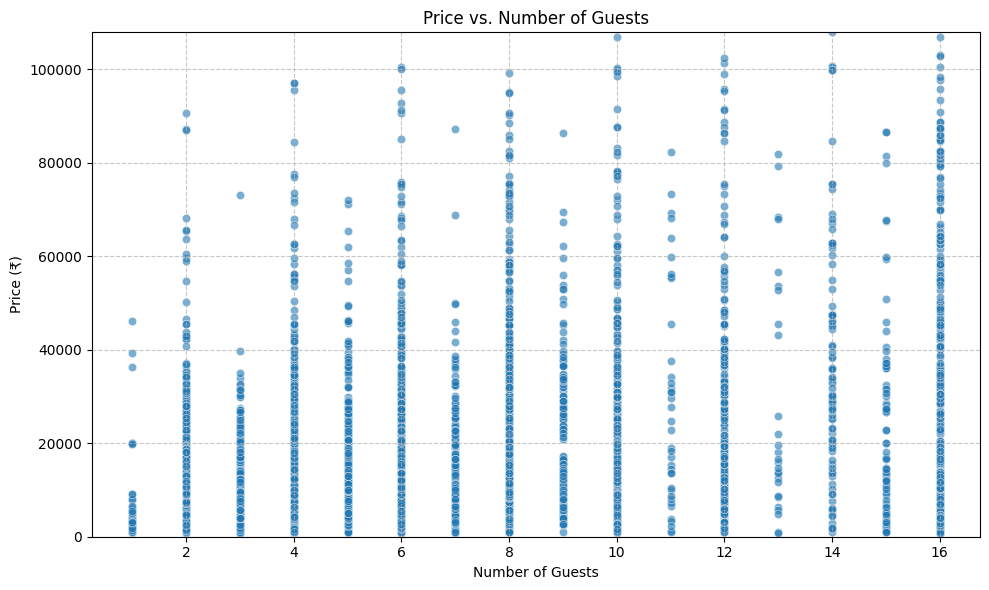

In [414]:
# Scatter Plot 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='guests', y='price', data=df, alpha=0.6)
plt.title('Price vs. Number of Guests')
plt.xlabel('Number of Guests')
plt.ylabel('Price (₹)')
plt.ylim(0, df['price'].quantile(0.99))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_vs_guests.png')
plt.show()

>>>> * #### Plot Price vs Number of Guest

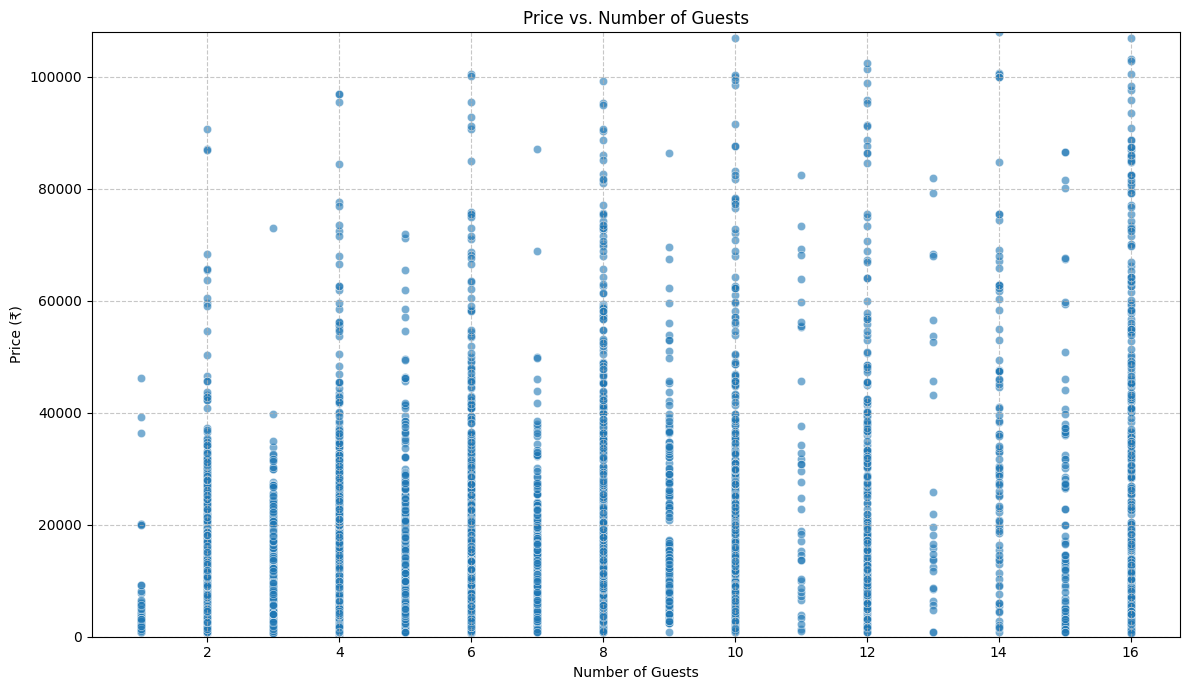

In [415]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='guests', y='price', data=df, alpha=0.6)
plt.title('Price vs. Number of Guests')
plt.xlabel('Number of Guests')
plt.ylabel('Price (₹)')
plt.ylim(0, df['price'].quantile(0.99))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_vs_guests.png')
plt.show()


>>>> * #### Plot Price vs Bedrooms

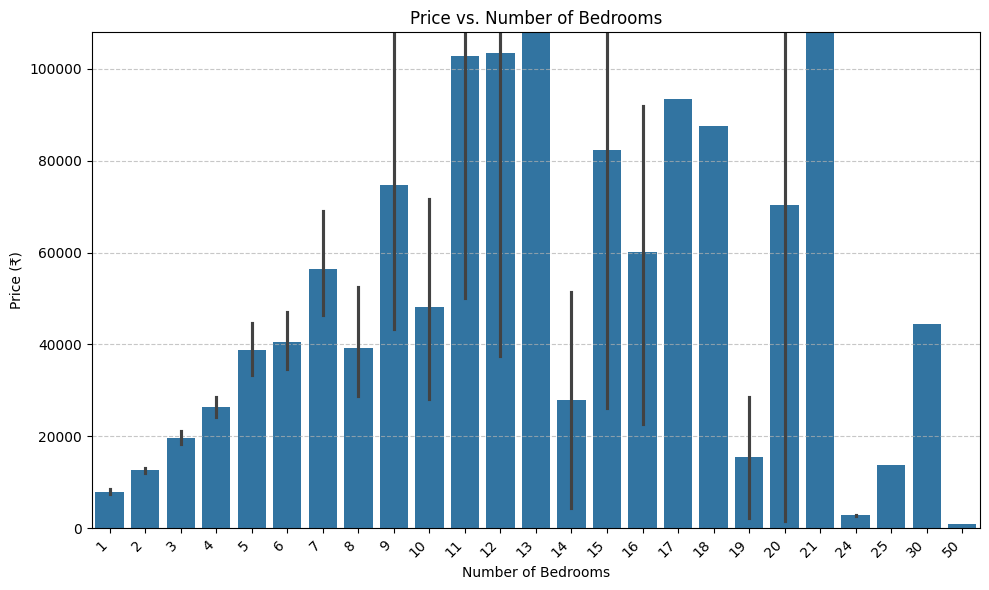

In [416]:
# Box PLot 
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=df)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Price (₹)')
plt.ylim(0, df['price'].quantile(0.99))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_vs_bedrooms.png')
plt.show()

>>>> * #### Plot Price vs Bathrooms

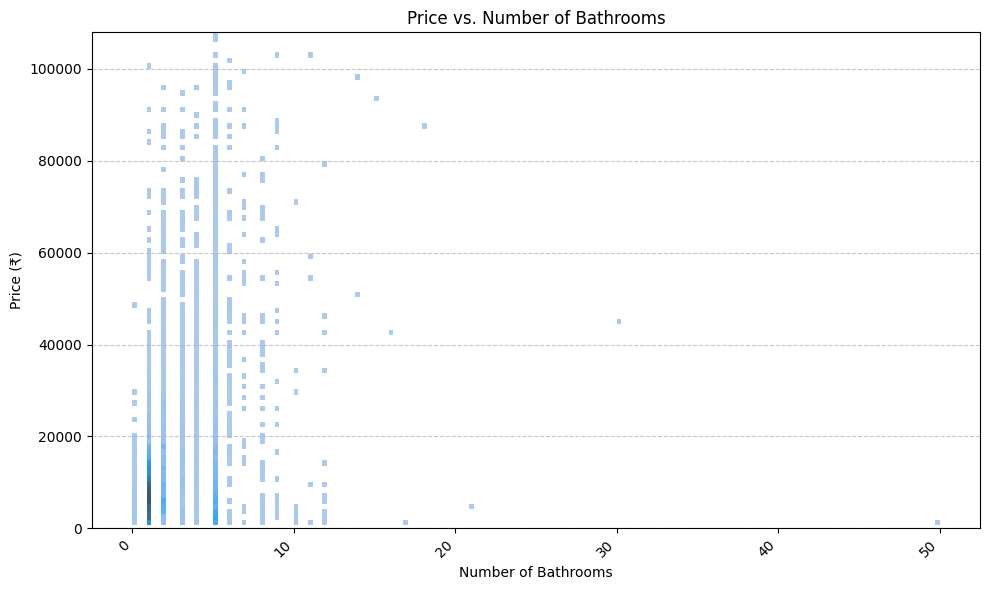

In [417]:
plt.figure(figsize=(10, 6))
sns.histplot(x='bathrooms', y='price', data=df)
plt.title('Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Price (₹)')
plt.ylim(0, df['price'].quantile(0.99))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_vs_bathrooms.png')
plt.show()

>>> * #### Number of listing related to Price

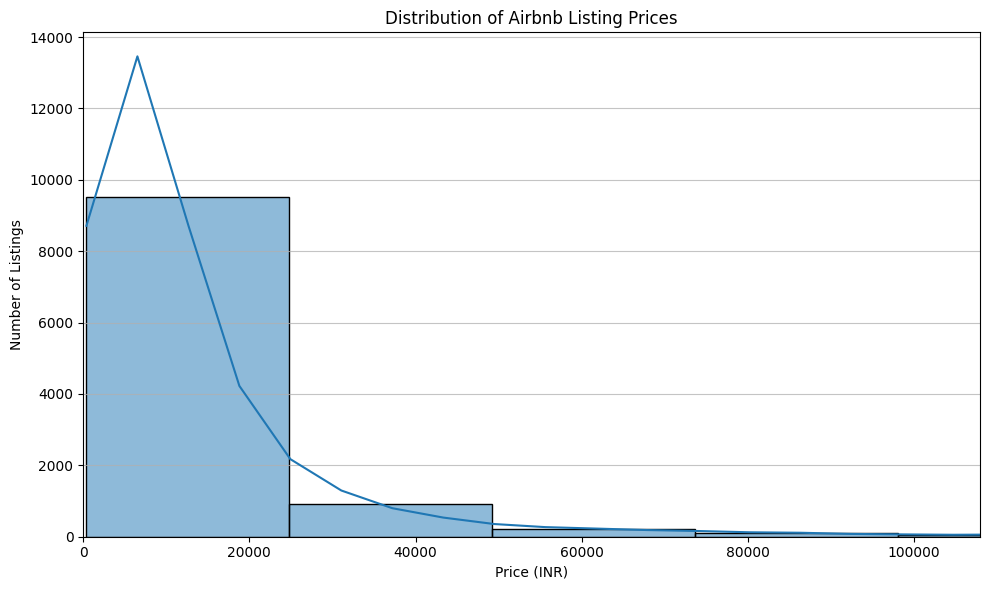

In [418]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Listing Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Number of Listings')
plt.grid(axis='y', alpha=0.75)
plt.xlim(0, df['price'].quantile(0.99))
plt.tight_layout()
plt.savefig('price_distribution_histogram.png')
plt.show()


>> * ### Reviews - Columns Analysis 

In [419]:
# Renaming 'reviews' to 'number_of_reviews' for clarity based on original problem description
df.rename(columns={'reviews': 'number_of_reviews'}, inplace=True)


In [420]:
# Check data type and descriptive statistics for 'number_of_reviews'
print("\nInfo for 'number_of_reviews' column:")
print(df[['number_of_reviews']].info())
print("\nDescriptive statistics for 'number_of_reviews' column:")
print(df['number_of_reviews'].describe())


Info for 'number_of_reviews' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10904 entries, 0 to 10903
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   number_of_reviews  10904 non-null  int64
dtypes: int64(1)
memory usage: 85.3 KB
None

Descriptive statistics for 'number_of_reviews' column:
count    10904.000000
mean        44.364087
std         70.361598
min          0.000000
25%          5.000000
50%         18.000000
75%         53.000000
max       1003.000000
Name: number_of_reviews, dtype: float64


>>>> * #### Plot for 'Number of Reviews' - Histogram

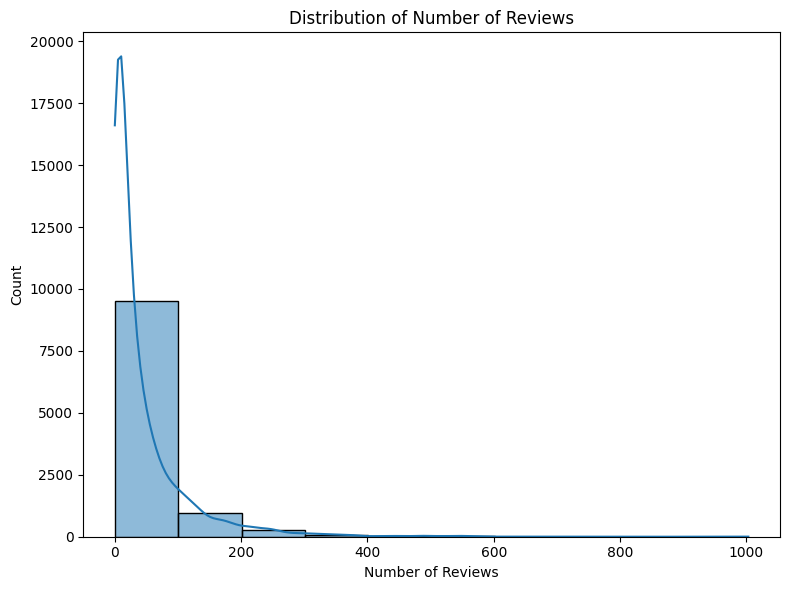

In [421]:
plt.figure(figsize=(8, 6))
sns.histplot(df['number_of_reviews'], kde=True, bins=10) # Adjust bins for better visualization
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('distribution_number_of_reviews.png')
plt.show()

>>>> * #### Plot Price for 'number_of_reviews' - Scatter Plot

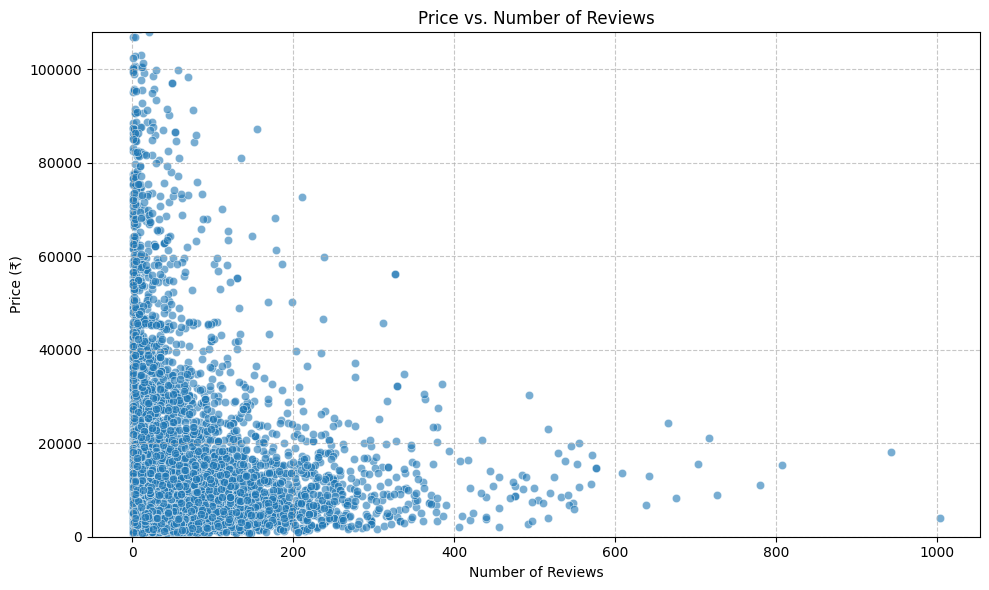

In [422]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.6)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (₹)')
plt.ylim(0, df['price'].quantile(0.99)) # Limit y-axis for better visualization
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_vs_number_of_reviews.png')
plt.show()

>> * ### Location Extraction

In [423]:
def parse_address(address_str):
    if pd.isna(address_str):
        return None, None, None # City, State/Region, Country

    parts = [p.strip() for p in address_str.strip().title().split(',')]
    
    country = None
    state_region = None
    city = None

    # Assuming the last part is usually the country
    if len(parts) > 0:
        country = parts[-1]
    
    # Second to last part is often State/Region
    if len(parts) > 1:
        state_region = parts[-2]
    
    # First part is often City
    if len(parts) > 2:
        city = parts[0]
    elif len(parts) == 2: # If only two parts, the first could be city or state
        city = parts[0] # Assume first is city, second is country
        state_region = None
    elif len(parts) == 1: # If only one part, it could be a country or city
        city = parts[0]
        country = parts[0]
        state_region = None

    return city, state_region, country

# Apply the function to create new columns
df[['City', 'State_Region', 'Country']] = df['address'].apply(lambda x: pd.Series(parse_address(x)))

print("\nHead of DataFrame with new geographic columns:")
print(df[['address', 'City', 'State_Region', 'Country']].head())

print("\nValue counts for 'Country':")
print(df['Country'].value_counts())

print("\nValue counts for 'State_Region':")
print(df['State_Region'].value_counts())

print("\nValue counts for 'City' (Top 10):")
print(df['City'].value_counts().head(10))


Head of DataFrame with new geographic columns:
                                             address                City  \
0                           Kartepe, Kocaeli, Turkey             Kartepe   
1                                   Imereti, Georgia             Imereti   
2                           Sapanca, Sakarya, Turkey             Sapanca   
3  Tambon Bang Kachai, Chang Wat Chanthaburi, Tha...  Tambon Bang Kachai   
4  Sanoe-myeon, Boeun-gun, North Chungcheong Prov...         Sanoe-Myeon   

                 State_Region      Country  
0                     Kocaeli       Turkey  
1                        None      Georgia  
2                     Sakarya       Turkey  
3       Chang Wat Chanthaburi     Thailand  
4  North Chungcheong Province  South Korea  

Value counts for 'Country':
Country
India         2341
Italy          945
Greece         876
Thailand       552
France         446
              ... 
Argentina        1
Jamaica          1
Guatemala        1
Senegal          

In [424]:
df.head()

,id,name,rating,number_of_reviews,host_name,host_id,address,features,amenities,safety_rules,...,cleaned_safety_rules,has_airbnbs_covid_19_safety_practices_apply,has_smoke_alarm,has_carbon_monoxide_alarm,has_security_camerarecording_device,has_no_smoke_alarm,has_no_carbon_monoxide_alarm,City,State_Region,Country
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,"Airbnb's COVID-19 safety practices apply,,No c...",1,0,0,0,1,1,Kartepe,Kocaeli,Turkey
1,50699164,cottages sataplia,4.85,68,Giorgi,409690853,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,"Airbnb's COVID-19 safety practices apply,,No c...",1,0,0,0,1,1,Imereti,None,Georgia
2,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,"Airbnb's COVID-19 safety practices apply,,No c...",1,0,0,1,1,1,Sapanca,Sakarya,Turkey
3,42075682,"The Cottage, Private Pool Villa",4.67,3,Sukanya,173126583,"Tambon Bang Kachai, Chang Wat Chanthaburi, Tha...","10 guests,4 bedrooms,6 beds,3 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,"Airbnb's COVID-19 safety practices apply,,Carb...",1,1,1,0,0,0,Tambon Bang Kachai,Chang Wat Chanthaburi,Thailand
4,50425621,A private pension hut on the hillside of Sokli...,4.97,77,동현,81358542,"Sanoe-myeon, Boeun-gun, North Chungcheong Prov...","4 guests,1 bedroom,1 bed,1 bathroom","Mountain view,Kitchen,Free on-street parking,C...","󹀁,Airbnb's COVID-19 safety practices apply,Car...",...,"Airbnb's COVID-19 safety practices apply,Carbo...",1,1,1,0,0,0,Sanoe-Myeon,North Chungcheong Province,South Korea


>>>> * #### Analyze Price by Location

In [425]:
# 1. Identify top countries
country_counts = df['Country'].value_counts()
print("\nTop Countries by Listing Count:\n", country_counts)

# Select top N countries for analysis (e.g., top 5)
top_n_countries = country_counts.head(5).index.tolist()
df_top_countries = df[df['Country'].isin(top_n_countries)]


Top Countries by Listing Count:
 Country
India         2341
Italy          945
Greece         876
Thailand       552
France         446
              ... 
Argentina        1
Jamaica          1
Guatemala        1
Senegal          1
Bangladesh       1
Name: count, Length: 114, dtype: int64


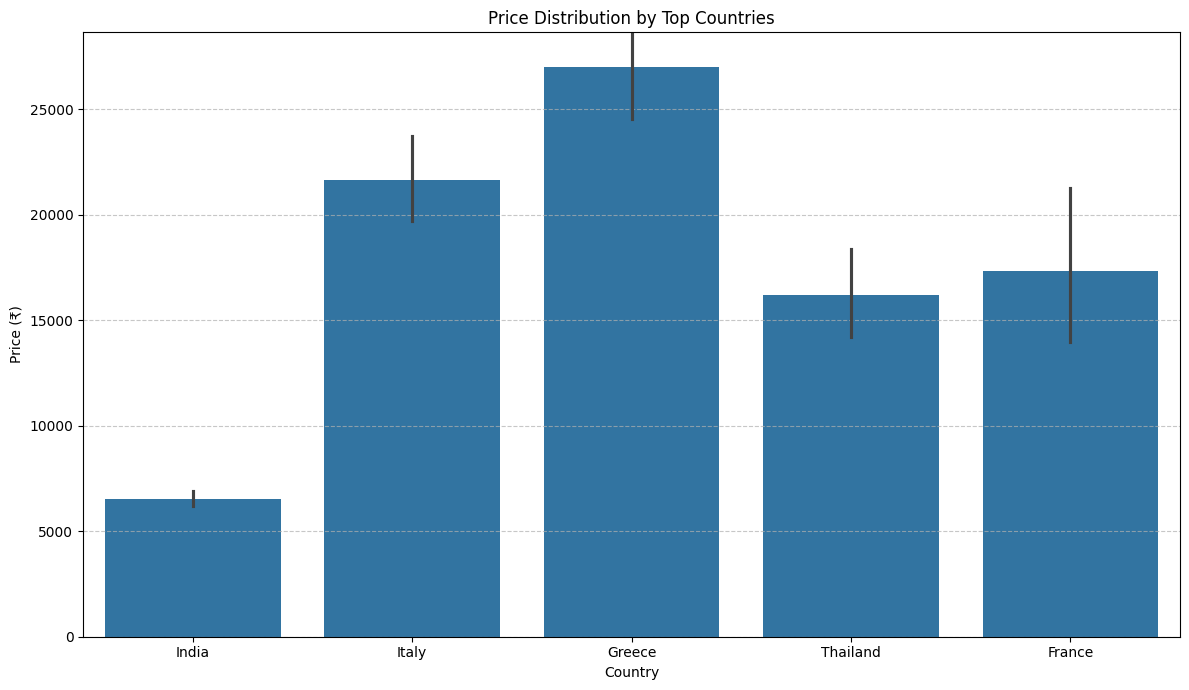

In [426]:
# Plot price distribution by Country

plt.figure(figsize = (12,7))
sns.barplot(x='Country', y='price', data=df_top_countries, order=top_n_countries)
plt.title('Price Distribution by Top Countries')
plt.xlabel('Country')
plt.ylabel('Price (₹)')
plt.ylim(0, df['price'].quantile(0.90))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_by_country.png')
plt.show()

In [427]:
# 2. Identify top cities within the primary country
# First, let's confirm the most dominant country.
dominant_country = df['Country'].value_counts().idxmax()
print(f"\nDominant Country: {dominant_country}")

# Filter data for the dominant country
df_dominant_country = df[df['Country'] == dominant_country]

# Identify top cities within the dominant country
city_counts_dominant_country = df_dominant_country['City'].value_counts()
print(f"\nTop Cities in {dominant_country} by Listing Count:\n", city_counts_dominant_country.head(10))

# Select top N cities for analysis (e.g., top 10)
top_n_cities_dominant_country = city_counts_dominant_country.head(10).index.tolist()
df_top_cities_dominant_country = df_dominant_country[df_dominant_country['City'].isin(top_n_cities_dominant_country)]


Dominant Country: India

Top Cities in India by Listing Count:
 City
Manali       165
New Delhi    145
Jibhi         70
Rishikesh     70
Candolim      60
Mumbai        53
Calangute     47
Srinagar      42
Mussoorie     38
Kasauli       31
Name: count, dtype: int64


>>>> * ##### Plot Price Distribution by Top City within the dominating country

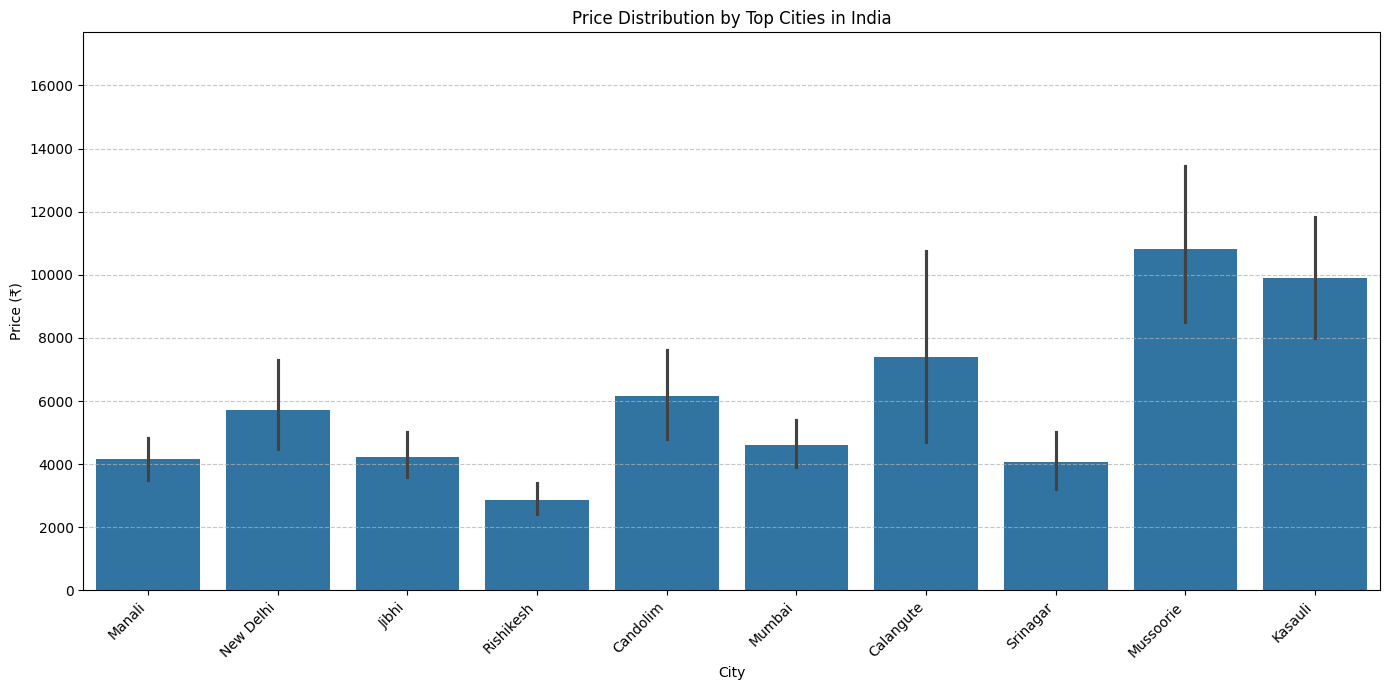

In [428]:
plt.figure(figsize=(14, 7))
sns.barplot(x='City', y='price', data=df_top_cities_dominant_country, order=top_n_cities_dominant_country)
plt.title(f'Price Distribution by Top Cities in {dominant_country}')
plt.xlabel('City')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df['price'].quantile(0.80)) # Exclude extreme outliers for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_by_city_dominant_country.png')
plt.show()

# 4. In-Depth Analysis

In [429]:
numerical_cols = ['price', 'rating', 'number_of_reviews', 'guests', 'bedrooms','listings_per_host', 'beds', 'bathrooms']

df_corr = df[numerical_cols].dropna()

print("\nNumerical columns selected for correlation analysis:")
print(df_corr.head())
print(f"\nShape of DataFrame for correlation analysis (after dropping NaNs): {df_corr.shape}")




Numerical columns selected for correlation analysis:
   price  rating  number_of_reviews  guests  bedrooms  listings_per_host  \
0   8078    4.71                 64       2         2                  2   
1   5991    4.85                 68       4         1                 19   
2  11339    5.00                 13       4         1                  1   
3  30486    4.67                  3      10         4                  1   
4   9052    4.97                 77       4         1                  1   

   beds  bathrooms  
0     1          1  
1     3          1  
2     2          1  
3     6          3  
4     1          1  

Shape of DataFrame for correlation analysis (after dropping NaNs): (6528, 8)


In [430]:
correlation_matrix = df_corr.corr()

print("\nCalculated Correlation Matrix:")
print(correlation_matrix)


Calculated Correlation Matrix:
                      price    rating  number_of_reviews    guests  bedrooms  \
price              1.000000  0.093722          -0.067433  0.442889  0.494220   
rating             0.093722  1.000000          -0.011423 -0.042686 -0.001264   
number_of_reviews -0.067433 -0.011423           1.000000 -0.101679 -0.111474   
guests             0.442889 -0.042686          -0.101679  1.000000  0.814981   
bedrooms           0.494220 -0.001264          -0.111474  0.814981  1.000000   
listings_per_host  0.028420  0.007901          -0.025172 -0.011713 -0.002135   
beds               0.395519 -0.016696          -0.084796  0.761617  0.829939   
bathrooms          0.324426 -0.006365          -0.095744  0.530116  0.619581   

                   listings_per_host      beds  bathrooms  
price                       0.028420  0.395519   0.324426  
rating                      0.007901 -0.016696  -0.006365  
number_of_reviews          -0.025172 -0.084796  -0.095744  
guests 

> * #### Visualize Correlation Matrix

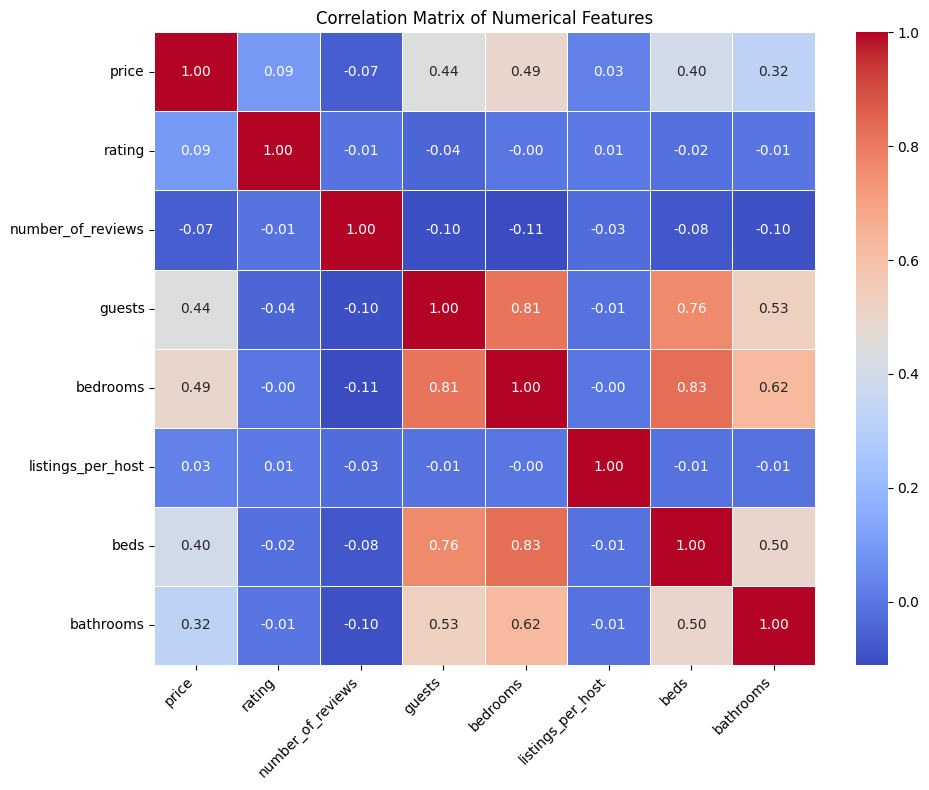

In [431]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

> * ### Analysis for Price in regarding to the features provided

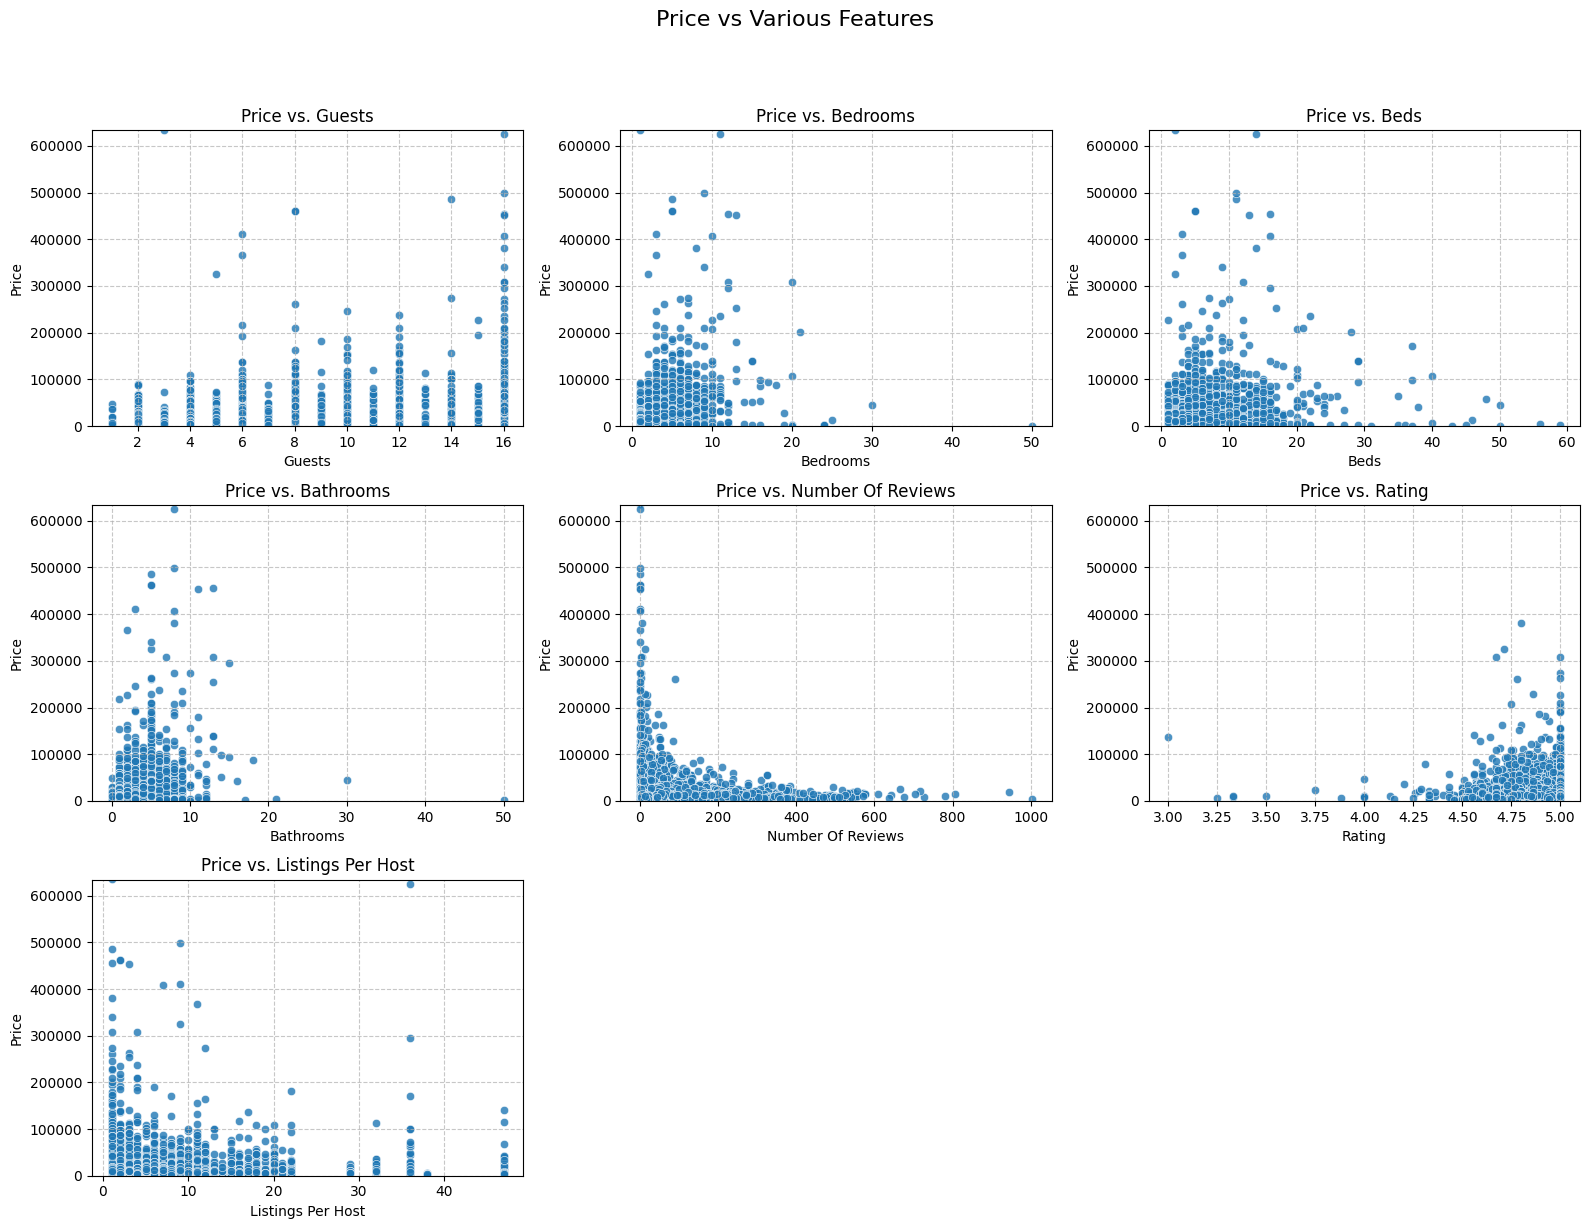

In [432]:
features_to_plot = ['guests', 'bedrooms', 'beds', 'bathrooms', 'number_of_reviews', 'rating', 'listings_per_host']

n_features = len(features_to_plot)
ncols = 3  # Number of columns you want
nrows = (n_features + ncols - 1) // ncols  # Auto-adjust number of rows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

fig.suptitle('Price vs Various Features', fontsize=16, y=1.02)

for i, feature in enumerate(features_to_plot):
    sns.scatterplot(x=df[feature], y=df['price'], alpha=0.8, ax=axes[i])
    axes[i].set_title(f'Price vs. {feature.replace("_", " ").title()}')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Price')
    axes[i].set_ylim(0, df['price'].quantile(0.9999))
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Remove any extra unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('price_vs_multiple_features.png')
plt.show()

> * ### Distribution of Place in regarding Amenities

C:\Users\Jasmeet singh\AppData\Local\Temp\ipykernel_22692\1459933406.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_dist[i].set_xticklabels(['No', 'Yes'])
C:\Users\Jasmeet singh\AppData\Local\Temp\ipykernel_22692\1459933406.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_dist[i].set_xticklabels(['No', 'Yes'])
C:\Users\Jasmeet singh\AppData\Local\Temp\ipykernel_22692\1459933406.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_dist[i].set_xticklabels(['No', 'Yes'])
C:\Users\Jasmeet singh\AppData\Local\Temp\ipykernel_22692\1459933406.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_dist[i].set_xticklabels(['No', 'Yes'])


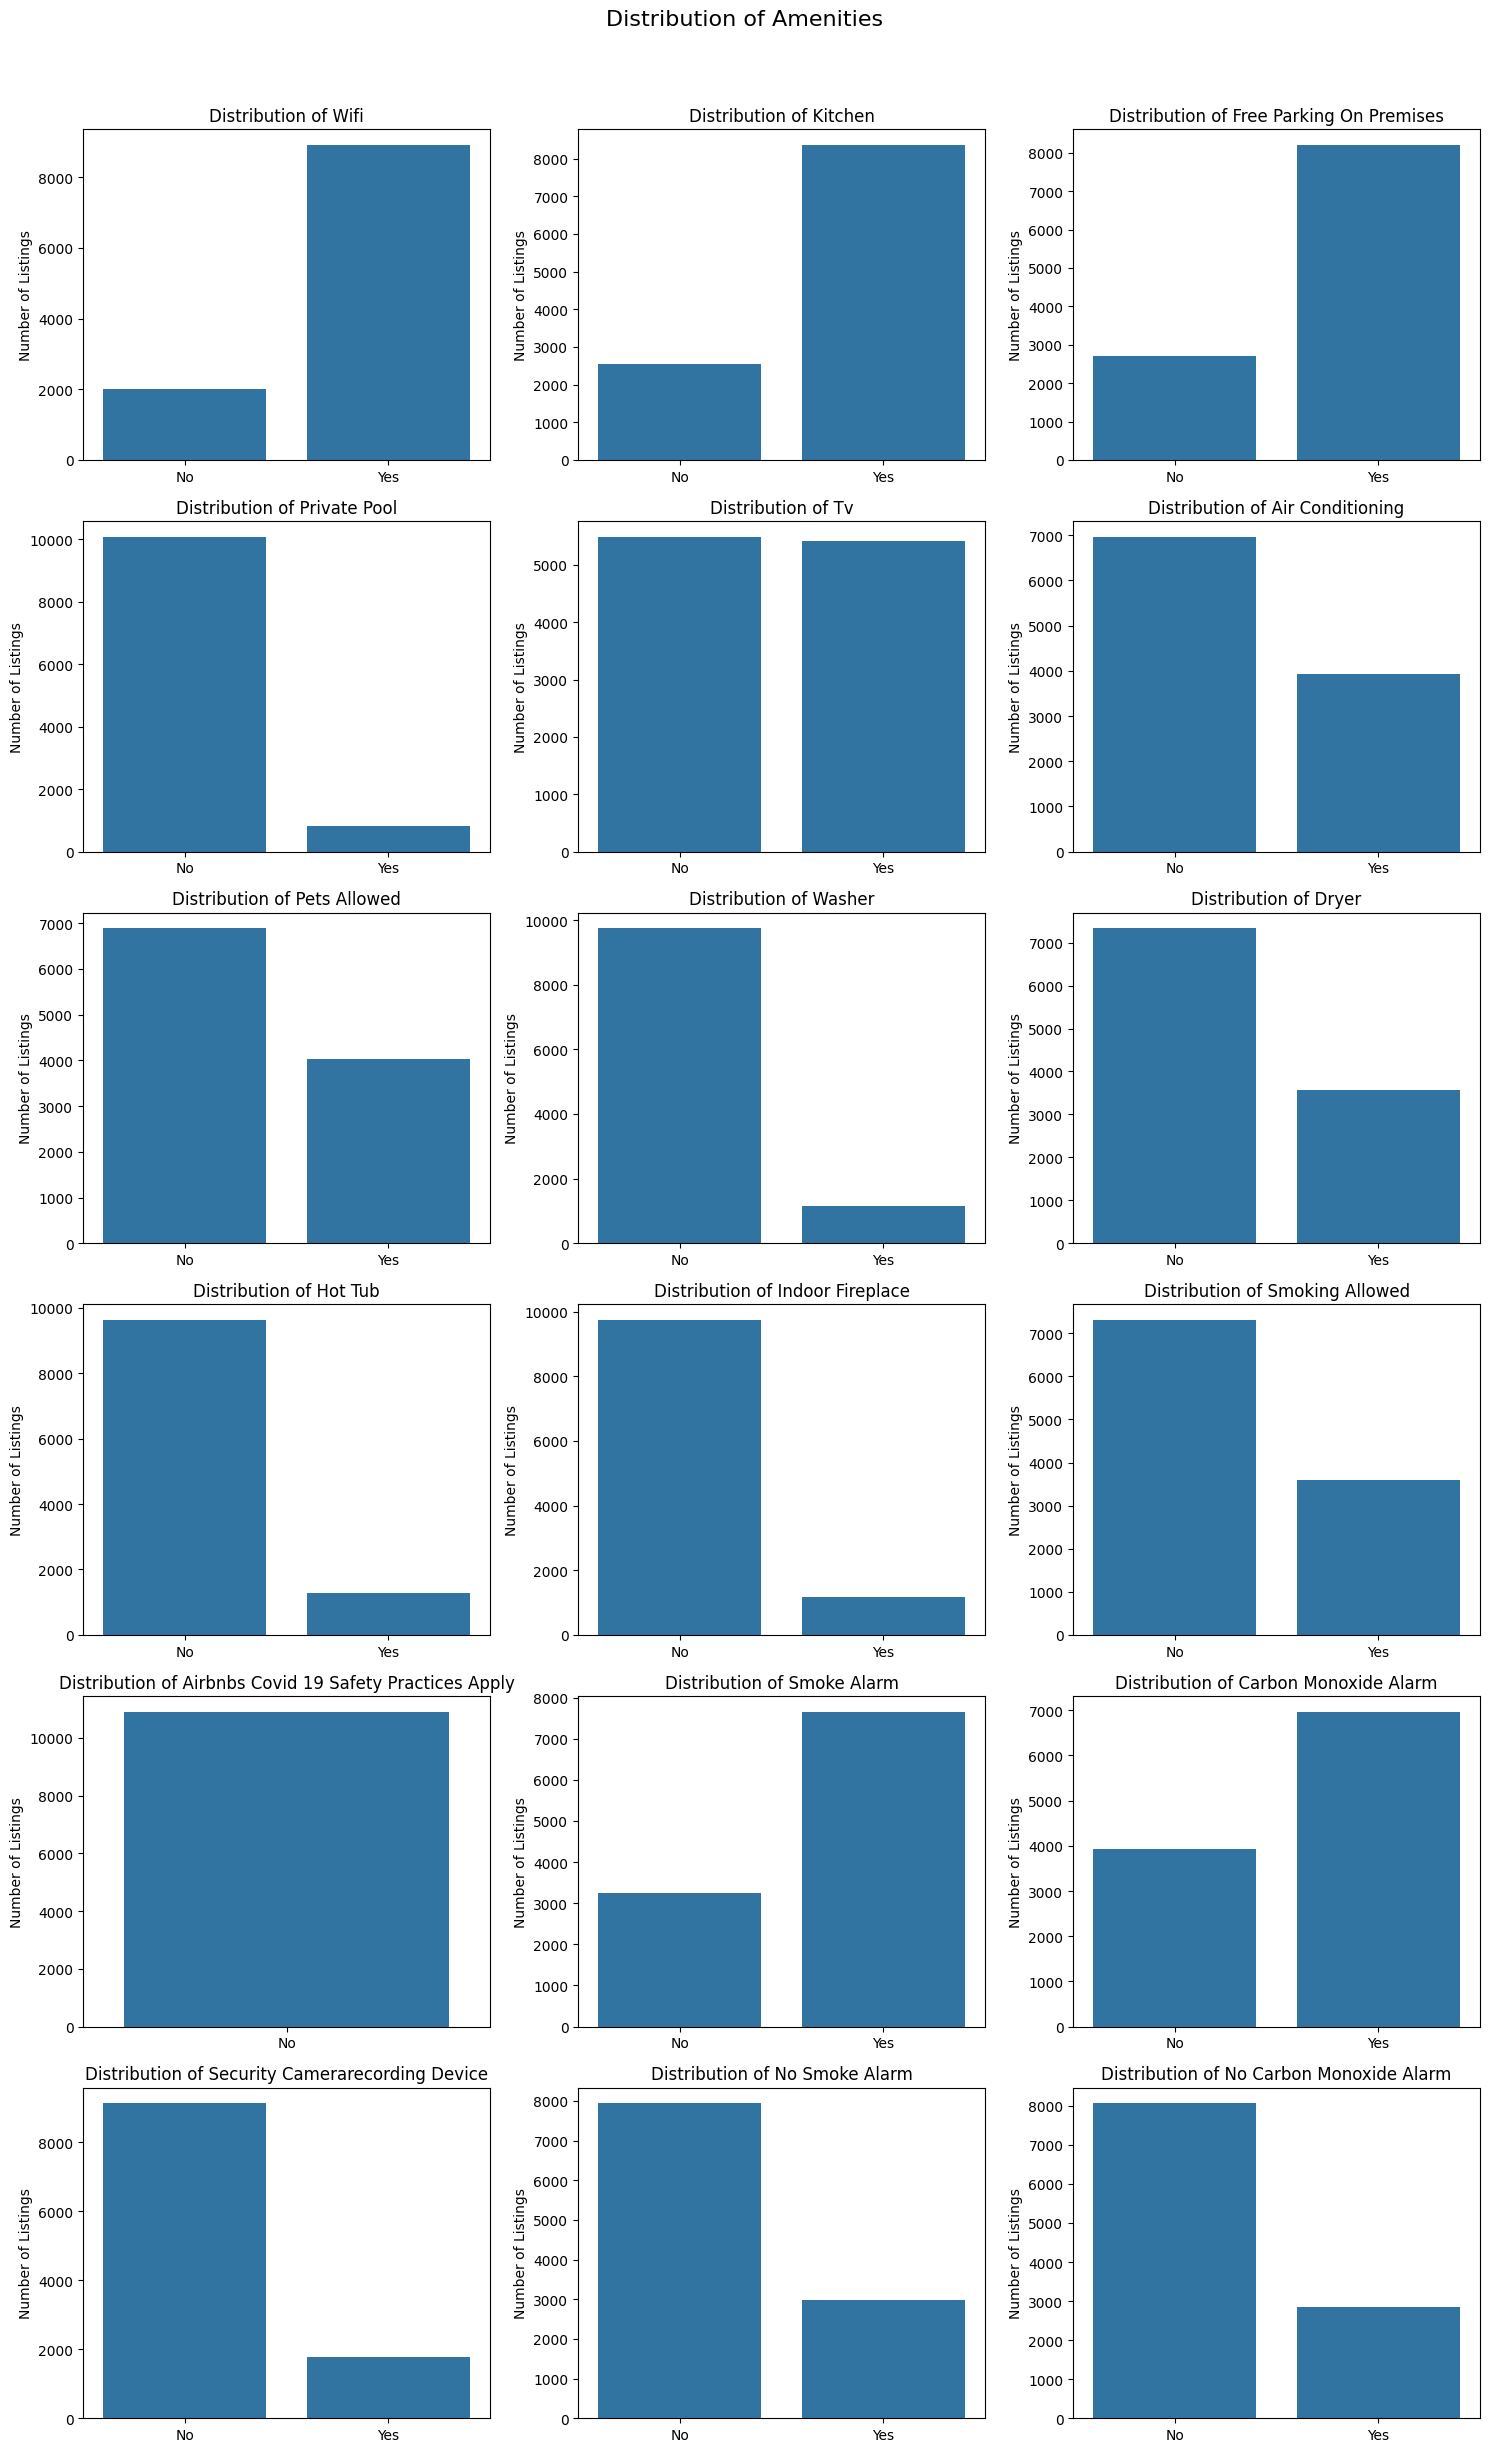

In [433]:
amenity_cols = [col for col in df.columns if col.startswith('has_')]
n_amenities = len(amenity_cols)
ncols = 3 # Desired number of columns for the plots
nrows = (n_amenities + ncols - 1) // ncols # Calculate rows needed

fig_dist, axes_dist = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
axes_dist = axes_dist.flatten() # Flatten the array of axes for easy iteration

fig_dist.suptitle('Distribution of Amenities', y=1.02, fontsize=16)

for i, col in enumerate(amenity_cols):
    sns.countplot(x=col, data=df, ax=axes_dist[i])
    axes_dist[i].set_title(f'Distribution of {col.replace("has_", "").replace("_", " ").title()}')
    axes_dist[i].set_xlabel('')
    axes_dist[i].set_ylabel('Number of Listings')
    axes_dist[i].set_xticklabels(['No', 'Yes'])

# Remove any unused subplots
for j in range(i + 1, len(axes_dist)):
    fig_dist.delaxes(axes_dist[j])

plt.tight_layout()
plt.savefig('amenity_distributions_multi_column.png')
plt.show()


> * ### Average Price by Amenities Presented

C:\Users\Jasmeet singh\AppData\Local\Temp\ipykernel_22692\996481035.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_price[i].set_xticklabels(['No', 'Yes'])
C:\Users\Jasmeet singh\AppData\Local\Temp\ipykernel_22692\996481035.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_price[i].set_xticklabels(['No', 'Yes'])
C:\Users\Jasmeet singh\AppData\Local\Temp\ipykernel_22692\996481035.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_price[i].set_xticklabels(['No', 'Yes'])
C:\Users\Jasmeet singh\AppData\Local\Temp\ipykernel_22692\996481035.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_price[i].set_xticklabels(['No', 'Yes'])


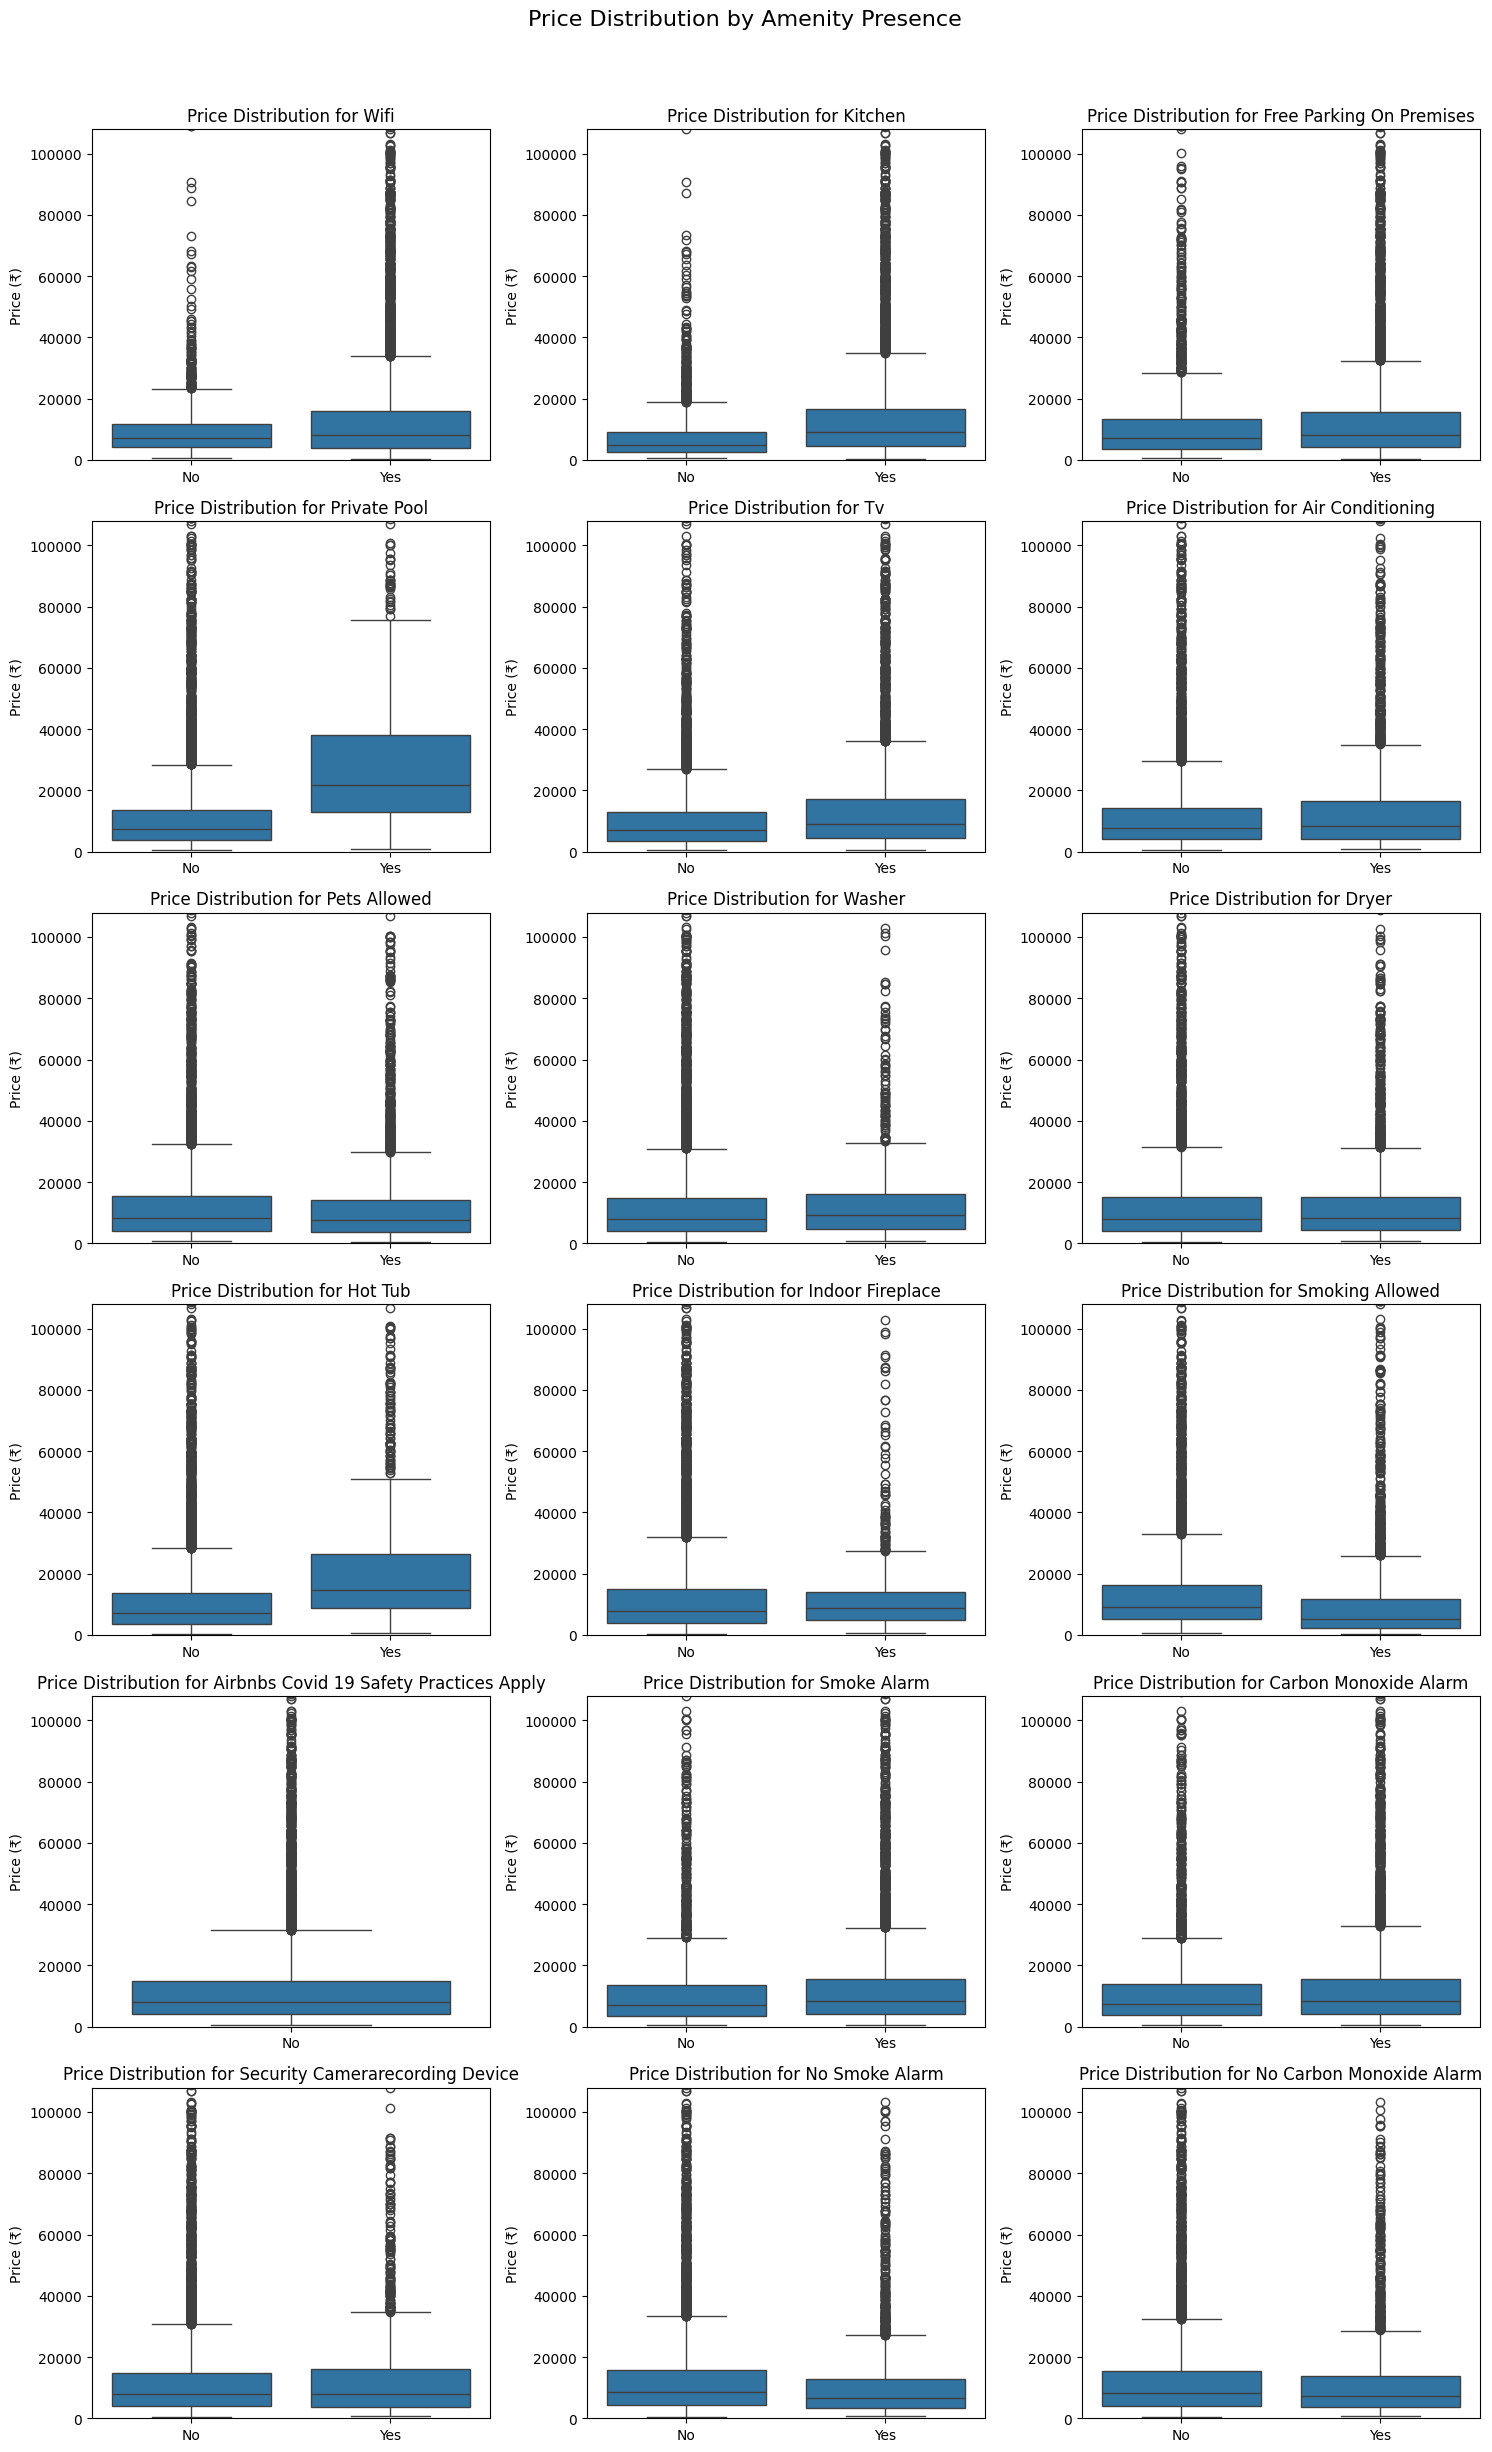

In [434]:

# Plotting average price by amenity presence in 2 columns
fig_price, axes_price = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
axes_price = axes_price.flatten()

fig_price.suptitle('Price Distribution by Amenity Presence', y=1.02, fontsize=16)

for i, col in enumerate(amenity_cols):
    sns.boxplot(x=col, y='price', data=df, ax=axes_price[i])
    axes_price[i].set_title(f'Price Distribution for {col.replace("has_", "").replace("_", " ").title()}')
    axes_price[i].set_xlabel('')
    axes_price[i].set_ylabel('Price (₹)')
    axes_price[i].set_xticklabels(['No', 'Yes'])
    axes_price[i].set_ylim(0, df['price'].quantile(0.99)) # Limit y-axis

# Remove any unused subplots
for j in range(i + 1, len(axes_price)):
    fig_price.delaxes(axes_price[j])

plt.tight_layout()
plt.savefig('amenity_price_impact_multi_column.png')
plt.show()


> * ### Key safety feature

>> * ### vs. Price

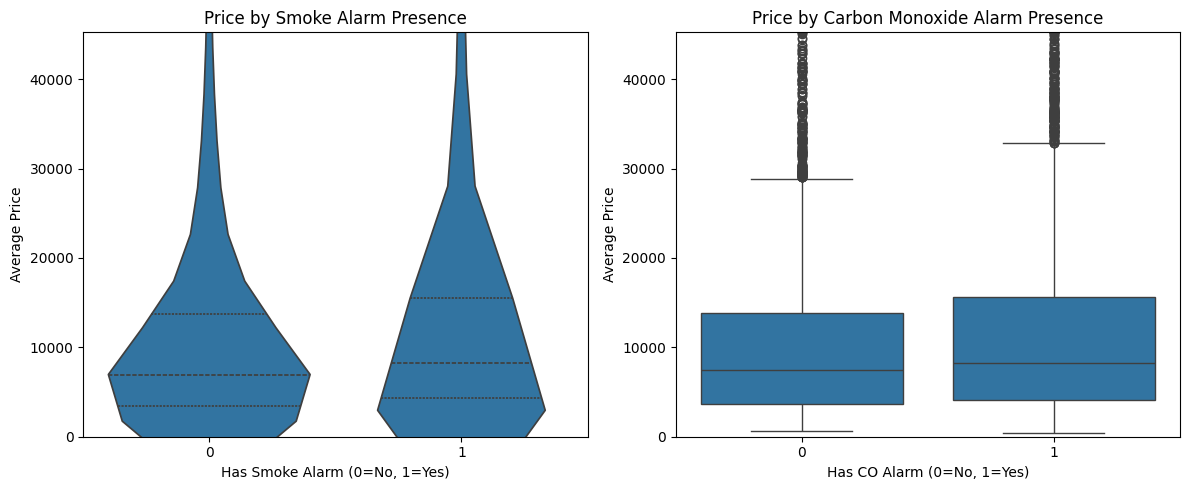

In [435]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.violinplot(x='has_smoke_alarm', y='price', data=df, inner='quartile')
plt.title('Price by Smoke Alarm Presence')
plt.xlabel('Has Smoke Alarm (0=No, 1=Yes)')
plt.ylabel('Average Price')
plt.ylim(0, df['price'].quantile(0.95)) # Cap y-axis for better visualization

plt.subplot(1, 2, 2)
sns.boxplot(x='has_carbon_monoxide_alarm', y='price', data=df)
plt.title('Price by Carbon Monoxide Alarm Presence')
plt.xlabel('Has CO Alarm (0=No, 1=Yes)')
plt.ylabel('Average Price')
plt.ylim(0, df['price'].quantile(0.95)) # Cap y-axis for better visualization

plt.tight_layout()
plt.show()

>> * ### vs. Rating

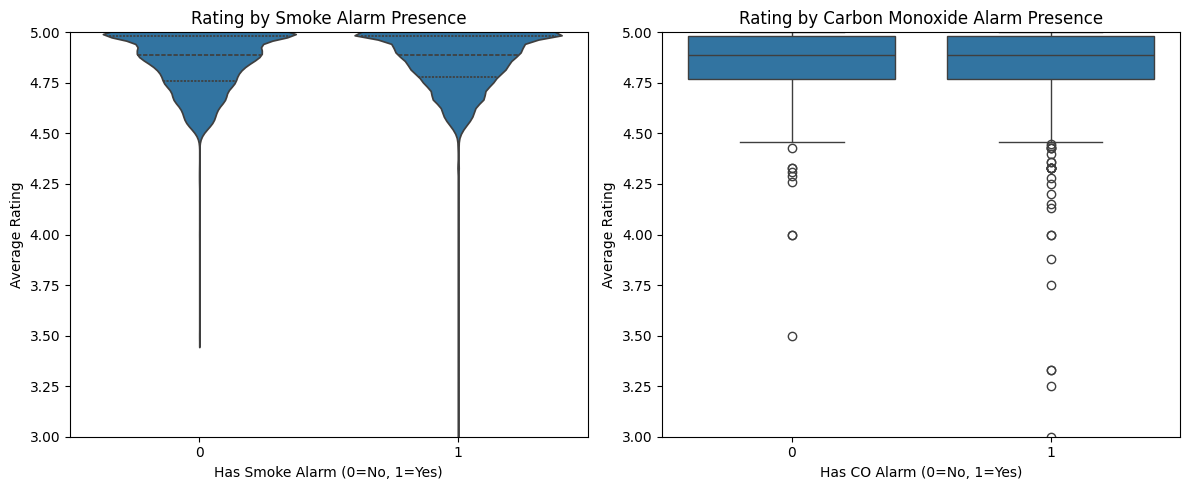

In [436]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.violinplot(x='has_smoke_alarm', y='rating', data=df, inner='quartile')
plt.title('Rating by Smoke Alarm Presence')
plt.xlabel('Has Smoke Alarm (0=No, 1=Yes)')
plt.ylabel('Average Rating')
plt.ylim(3, 5) # Ratings are typically between 3 and 5

plt.subplot(1, 2, 2)
sns.boxplot(x='has_carbon_monoxide_alarm', y='rating', data=df)
plt.title('Rating by Carbon Monoxide Alarm Presence')
plt.xlabel('Has CO Alarm (0=No, 1=Yes)')
plt.ylabel('Average Rating')
plt.ylim(3, 5) # Ratings are typically between 3 and 5

plt.tight_layout()
plt.show()

# 5. Exporting the df  

In [437]:
df.to_csv('airbnb_cleaned_data.csv', index=False)